In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')


# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [2]:
data=pd.read_csv("crime_data.csv")

In [3]:
data.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [4]:
data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
data.rename(columns={'Unnamed: 0':"State"},inplace=True)

In [6]:
data.head()

State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [7]:
data.shape

(50, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
data.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [12]:
data.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

#### There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

# Exploratory Data Analysis


#### Lets analyze the features by creating histograms to understand the distribution

In [13]:
df=data.copy()
df.head()

State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [14]:
x=df.iloc[:,1:-1]
x.head()

Murder  Assault  UrbanPop
0    13.2      236        58
1    10.0      263        48
2     8.1      294        80
3     8.8      190        50
4     9.0      276        91

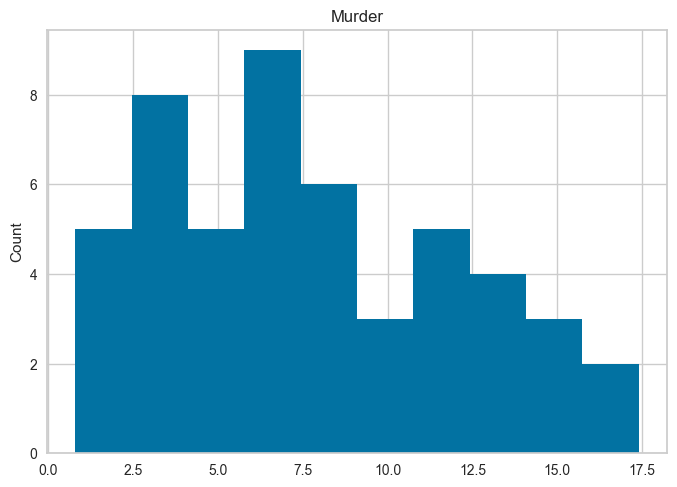

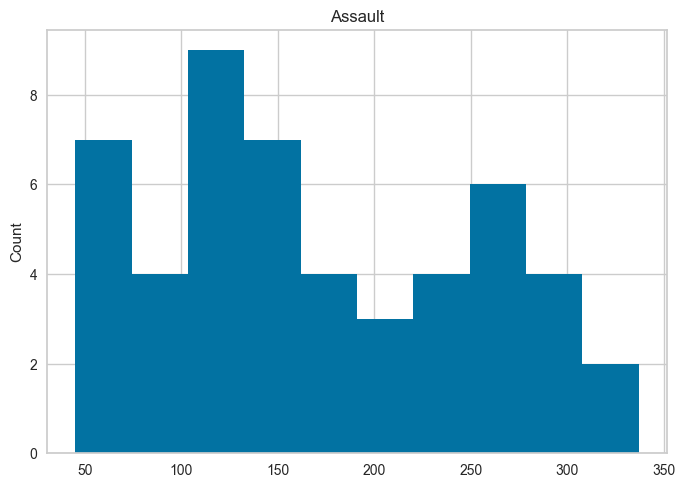

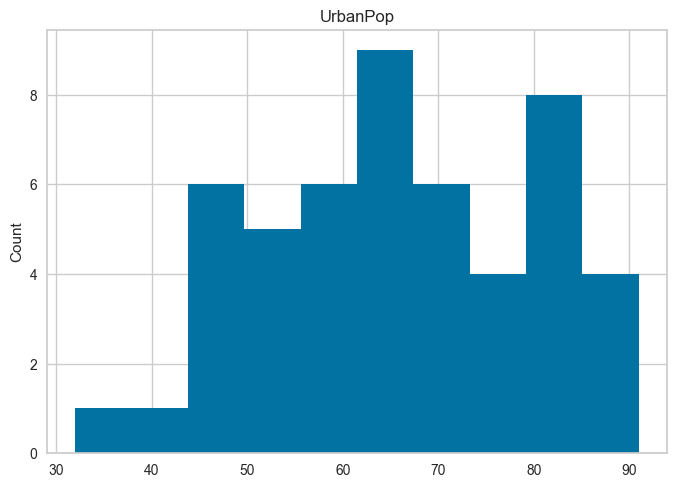

In [15]:
for feature in x:
    df[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Murder


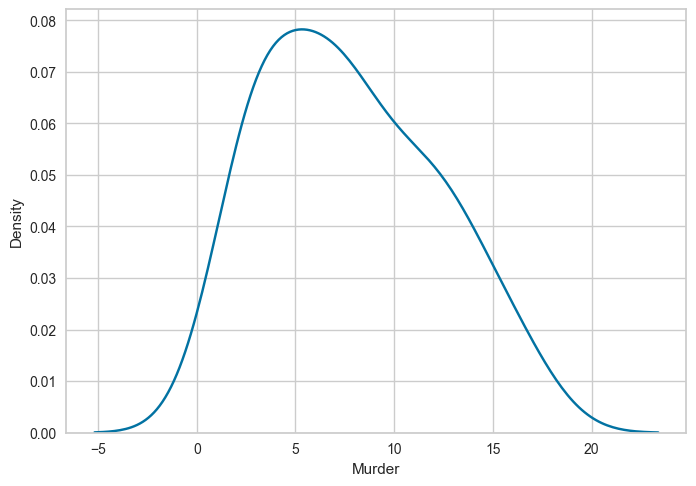

Assault


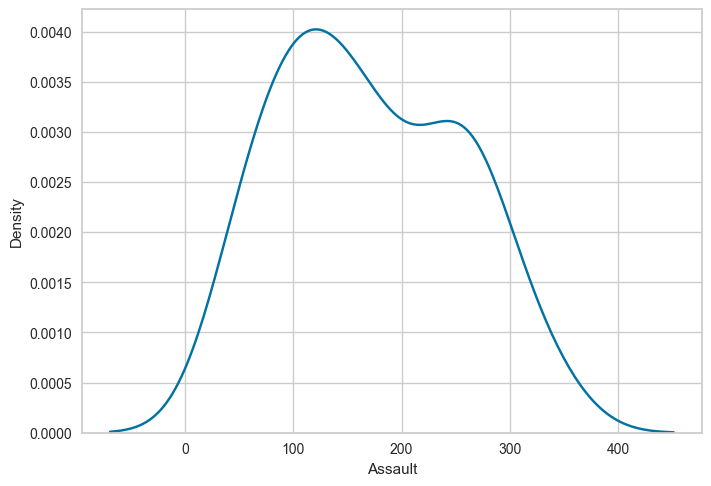

UrbanPop


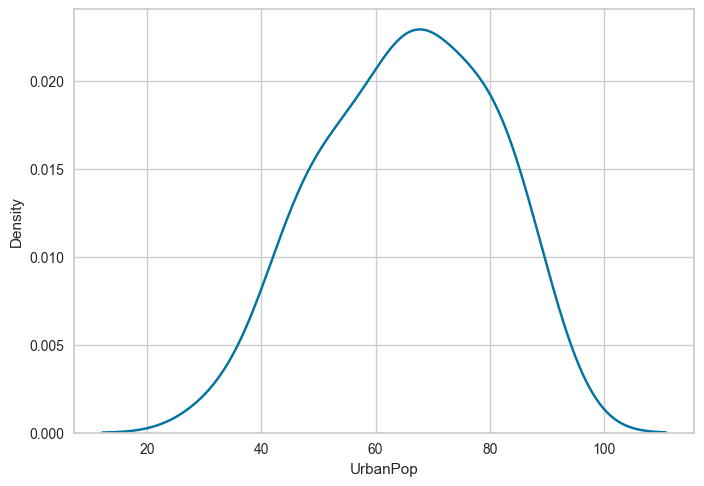

In [16]:
 # Kernel Density for every feature, singled out

for n in x:
    print(n)
    sn.kdeplot(data[n])
    plt.show()

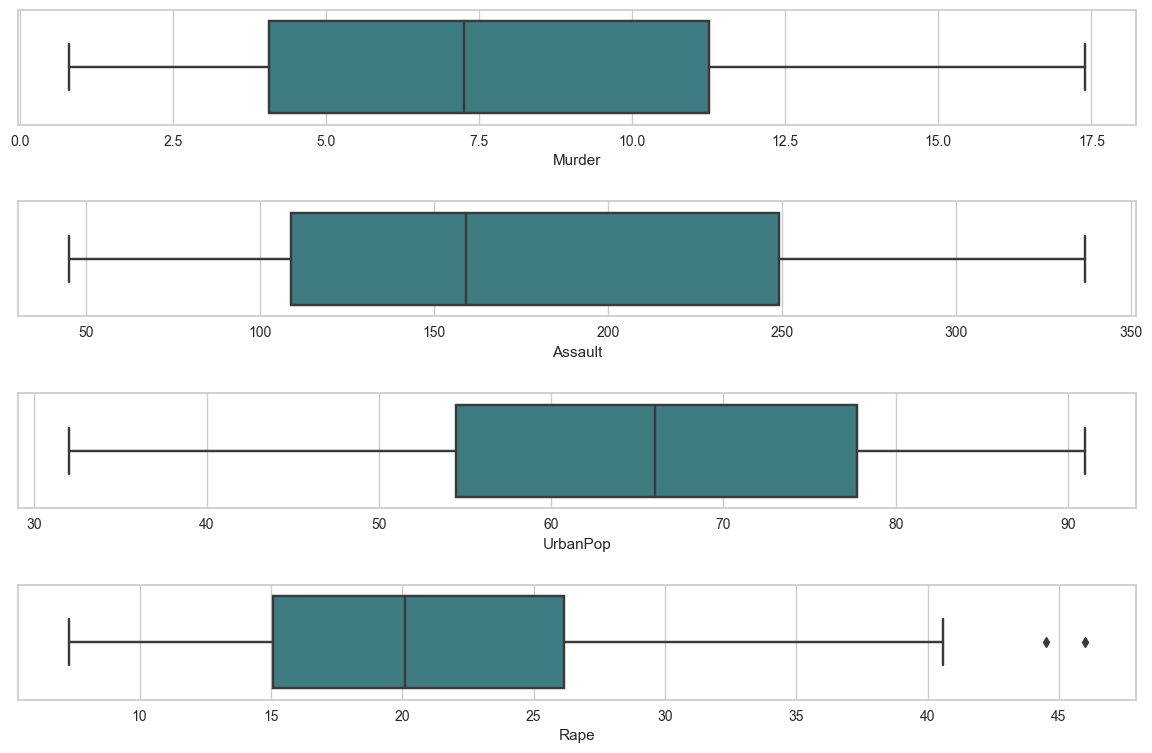

In [17]:
fig, axes=plt.subplots(4,1,figsize=(12,8))
sn.boxplot(x='Murder',data=df,palette='crest',ax=axes[0])
sn.boxplot(x='Assault',data=df,palette='crest',ax=axes[1])
sn.boxplot(x='UrbanPop',data=df,palette='crest',ax=axes[2])
sn.boxplot(x='Rape',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

<AxesSubplot: >

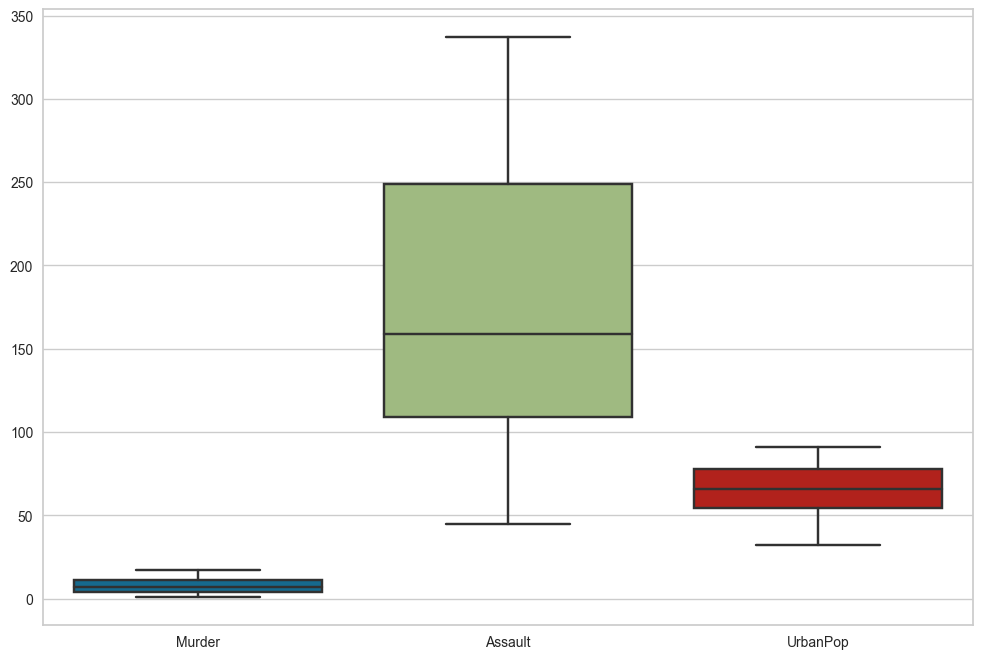

In [18]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sn.boxplot(data=x)

<AxesSubplot: >

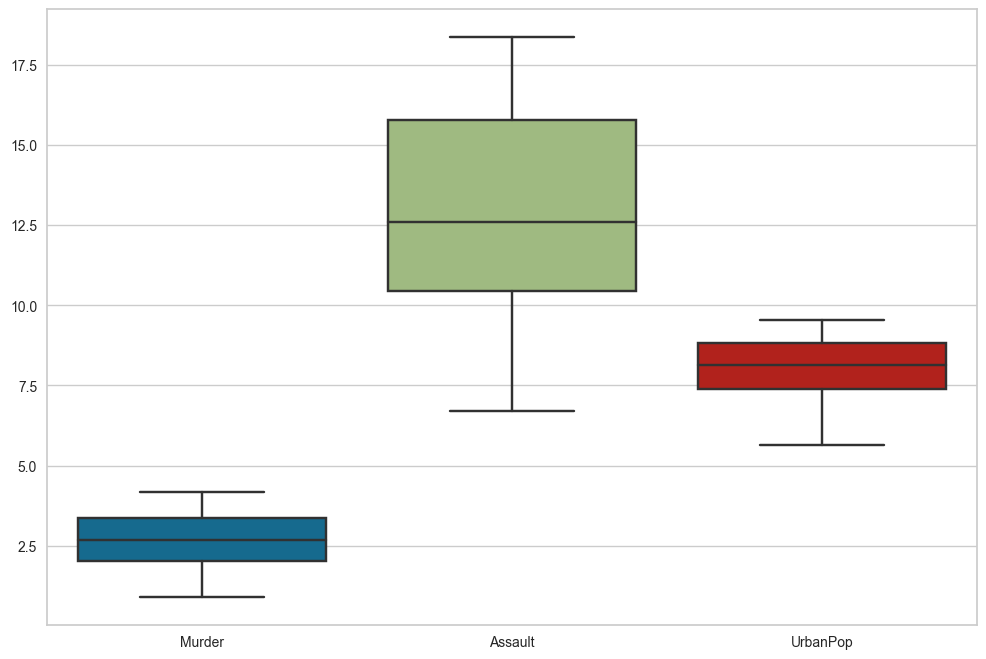

In [19]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sn.boxplot(data=np.sqrt(x))

# Data Visualization

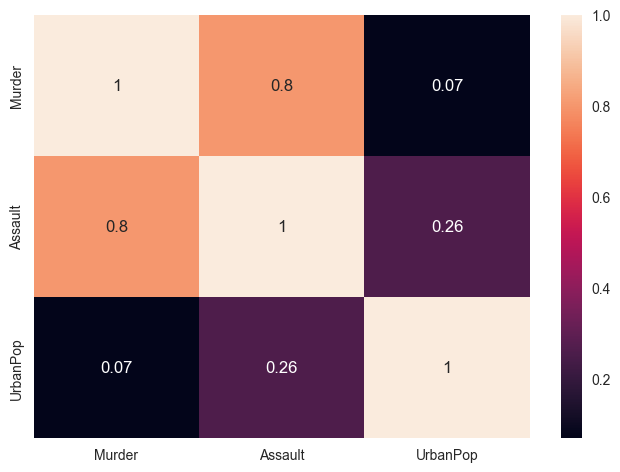

In [20]:
# Correlation heatmap
sn.heatmap(x.corr(),annot=True)
plt.show()

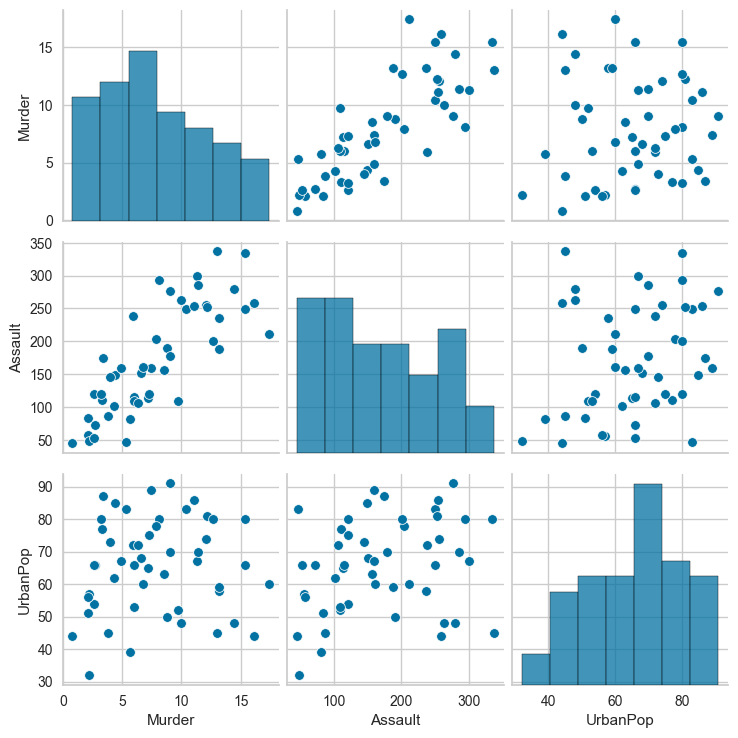

In [21]:
sn.pairplot(x)

In [22]:
data.head()

State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

### Insights of Murder Rate

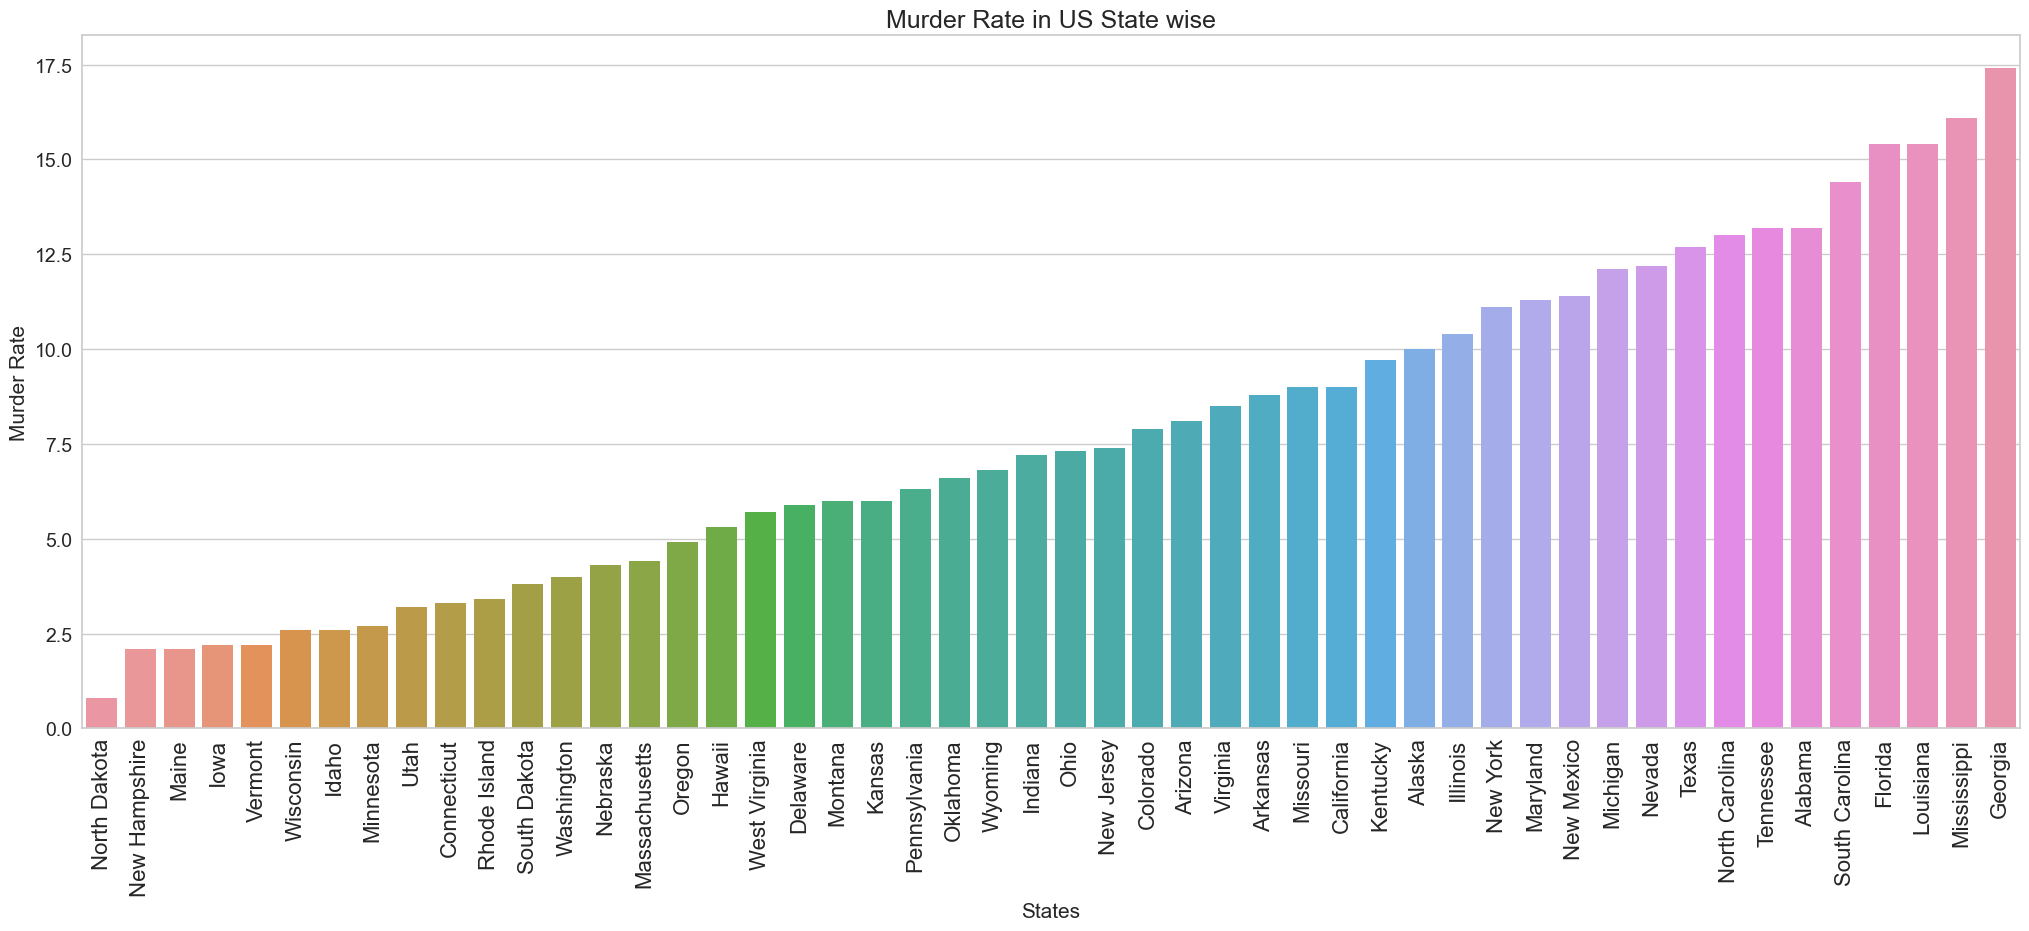

In [23]:
plt.figure(figsize=(25,9))
# make barplot and sort bars
sn.barplot(x='State',
            y="Murder", 
            data=data, 
            order=data.sort_values('Murder').State)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

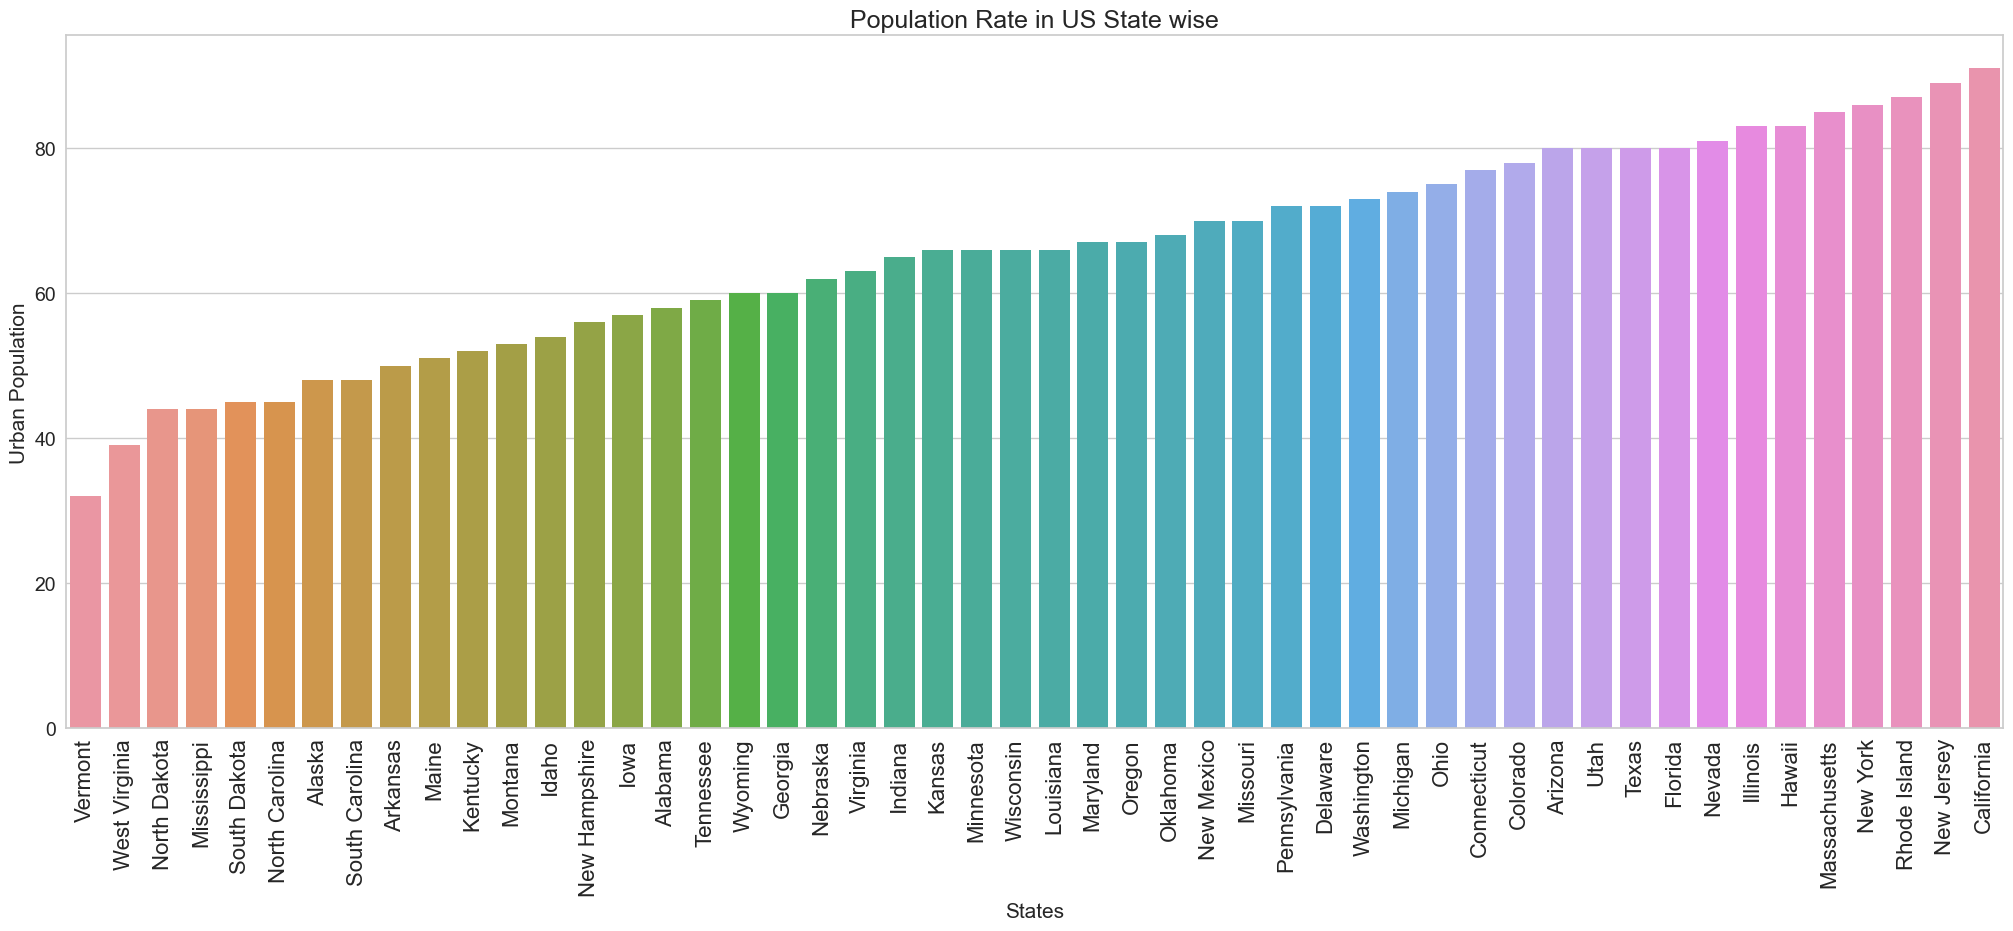

In [24]:
plt.figure(figsize=(25,9))
# make barplot and sort bars
sn.barplot(x='State',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').State)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Population Rate in US State wise", size=18)
plt.show()

In [25]:
print('Top 10 States with Highest Murder Rate')
data.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


State  Murder  Assault  UrbanPop  Rape
9          Georgia    17.4      211        60  25.8
23     Mississippi    16.1      259        44  17.1
8          Florida    15.4      335        80  31.9
17       Louisiana    15.4      249        66  22.2
39  South Carolina    14.4      279        48  22.5
0          Alabama    13.2      236        58  21.2
41       Tennessee    13.2      188        59  26.9
32  North Carolina    13.0      337        45  16.1
42           Texas    12.7      201        80  25.5
27          Nevada    12.2      252        81  46.0

In [26]:
print('Top 10 States with Lowest Murder Rate')
data.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


State  Murder  Assault  UrbanPop  Rape
33   North Dakota     0.8       45        44   7.3
28  New Hampshire     2.1       57        56   9.5
18          Maine     2.1       83        51   7.8
14           Iowa     2.2       56        57  11.3
44        Vermont     2.2       48        32  11.2
48      Wisconsin     2.6       53        66  10.8
11          Idaho     2.6      120        54  14.2
22      Minnesota     2.7       72        66  14.9
43           Utah     3.2      120        80  22.9
6     Connecticut     3.3      110        77  11.1

In [27]:
murder_L = data.sort_values('Murder', ascending = True,ignore_index=True)
murder_L.head()

State  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1  New Hampshire     2.1       57        56   9.5
2          Maine     2.1       83        51   7.8
3           Iowa     2.2       56        57  11.3
4        Vermont     2.2       48        32  11.2

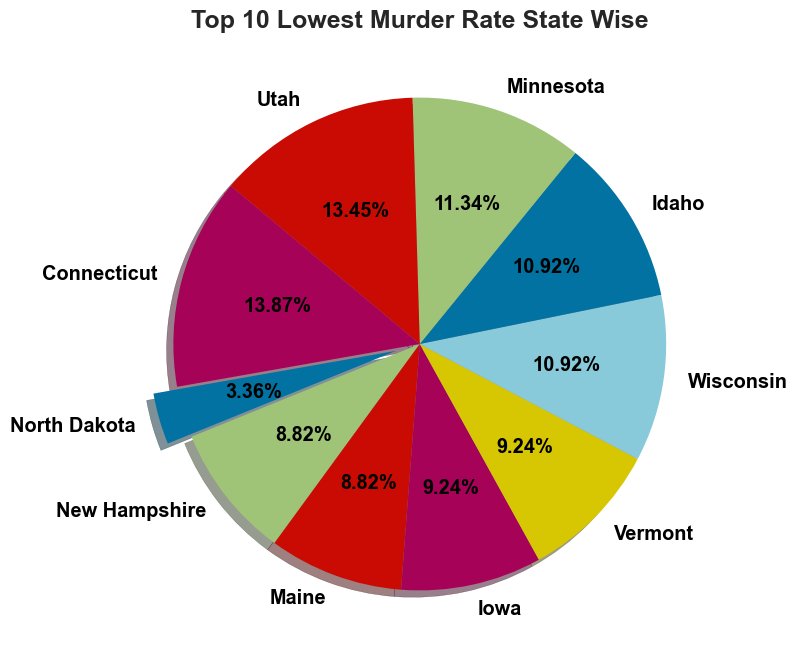

In [28]:
plt.figure(figsize = (8,8))
plt.pie(murder_L.Murder[:10],
       labels=murder_L.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Murder Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()


In [29]:
murder = data.sort_values('Murder', ascending = False, ignore_index=True)
murder.head()

State  Murder  Assault  UrbanPop  Rape
0         Georgia    17.4      211        60  25.8
1     Mississippi    16.1      259        44  17.1
2         Florida    15.4      335        80  31.9
3       Louisiana    15.4      249        66  22.2
4  South Carolina    14.4      279        48  22.5

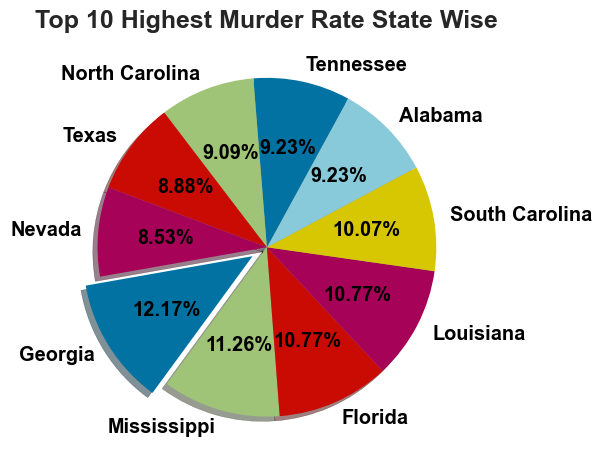

In [30]:
plt.pie(murder.Murder[:10],
       labels=murder.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

### Observations:
#### Highest Murder Rate : Georgia, Missisippi and Florida
#### Lowest Murder Rate : North Dakota, New Hampshire, Idaho, Iowa, Maine, Vermont and Wisconsin.

## Insights Of Assault Rate


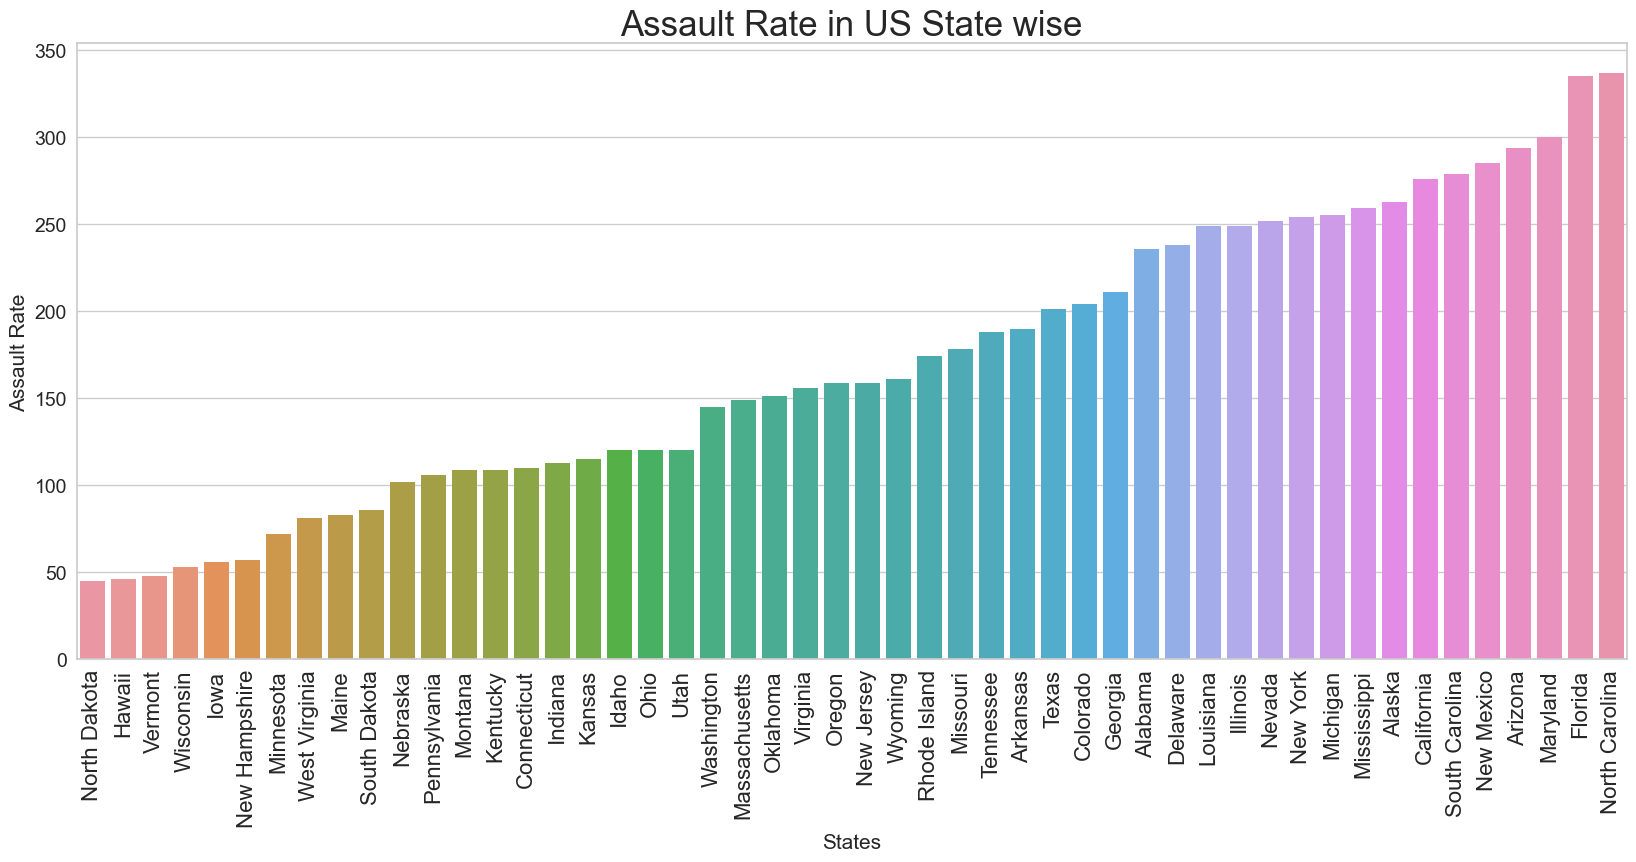

In [31]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sn.barplot(x='State',
            y="Assault", 
            data=data, 
            order=data.sort_values('Assault').State)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=25)
plt.show()

In [32]:
print('Top 10 States with Highest Assault Rate')
Assault_H=data.sort_values('Assault',ascending=False, ignore_index=True)
Assault_H.head(10)

Top 10 States with Highest Assault Rate


State  Murder  Assault  UrbanPop  Rape
0  North Carolina    13.0      337        45  16.1
1         Florida    15.4      335        80  31.9
2        Maryland    11.3      300        67  27.8
3         Arizona     8.1      294        80  31.0
4      New Mexico    11.4      285        70  32.1
5  South Carolina    14.4      279        48  22.5
6      California     9.0      276        91  40.6
7          Alaska    10.0      263        48  44.5
8     Mississippi    16.1      259        44  17.1
9        Michigan    12.1      255        74  35.1

In [33]:
print('Top 10 States with Lowest Assault Rate')
Assault_L=data.sort_values('Assault',ascending=True, ignore_index=True)
Assault_L.head(10)

Top 10 States with Lowest Assault Rate


State  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1         Hawaii     5.3       46        83  20.2
2        Vermont     2.2       48        32  11.2
3      Wisconsin     2.6       53        66  10.8
4           Iowa     2.2       56        57  11.3
5  New Hampshire     2.1       57        56   9.5
6      Minnesota     2.7       72        66  14.9
7  West Virginia     5.7       81        39   9.3
8          Maine     2.1       83        51   7.8
9   South Dakota     3.8       86        45  12.8

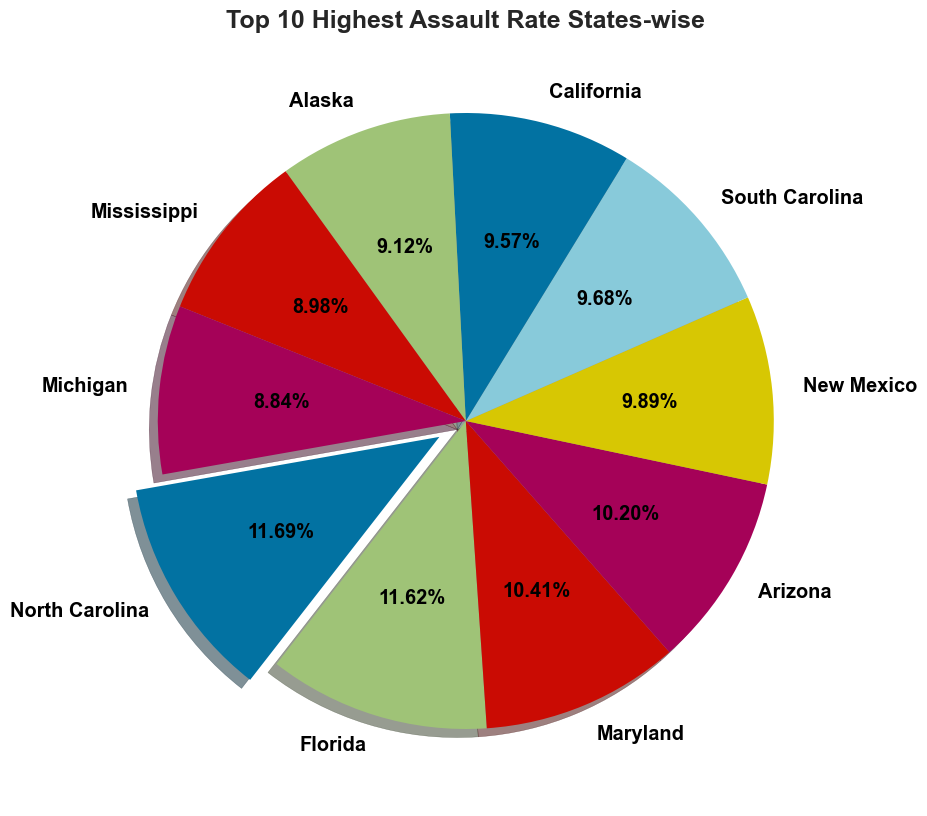

In [34]:
plt.figure(figsize=(10,10))
plt.pie(Assault_H.Assault[:10],
       labels=Assault_H.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

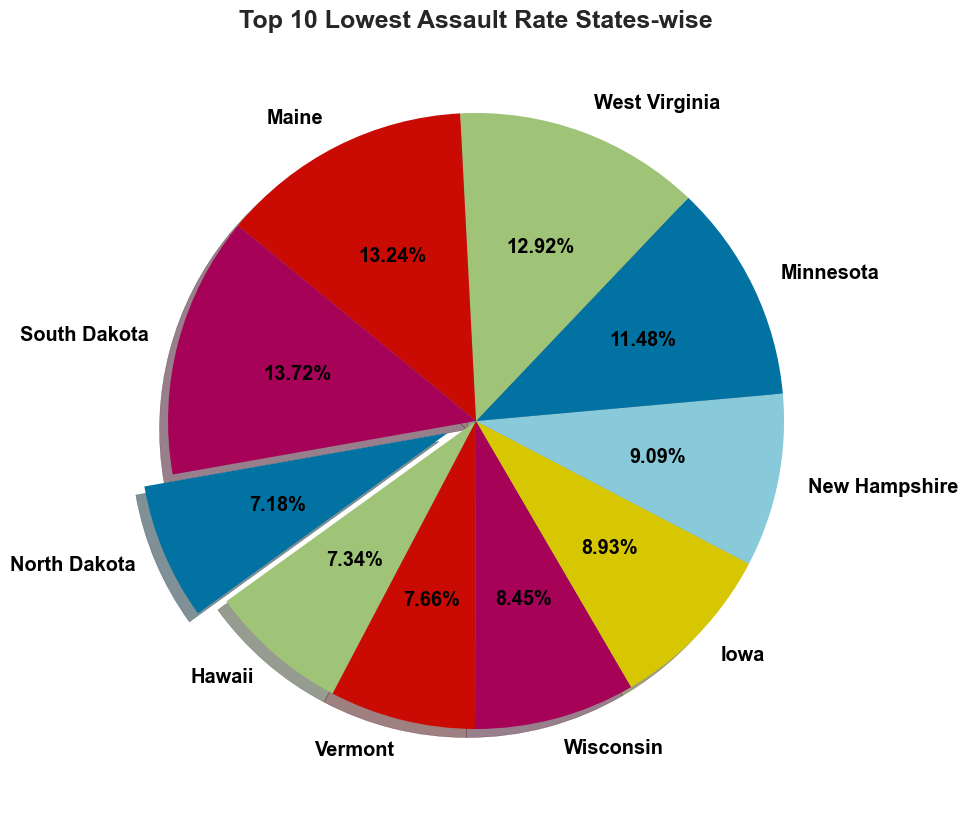

In [35]:
plt.figure(figsize=(10,10))
plt.pie(Assault_L.Assault[:10],
       labels=Assault_L.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

### Observations:
#### Highest Assault Rate : North Carolina, Florida and Maryland
#### Lowest Assault Rate : North Dakota, Hawaii and Vermont.


## Insights of Rape Rate

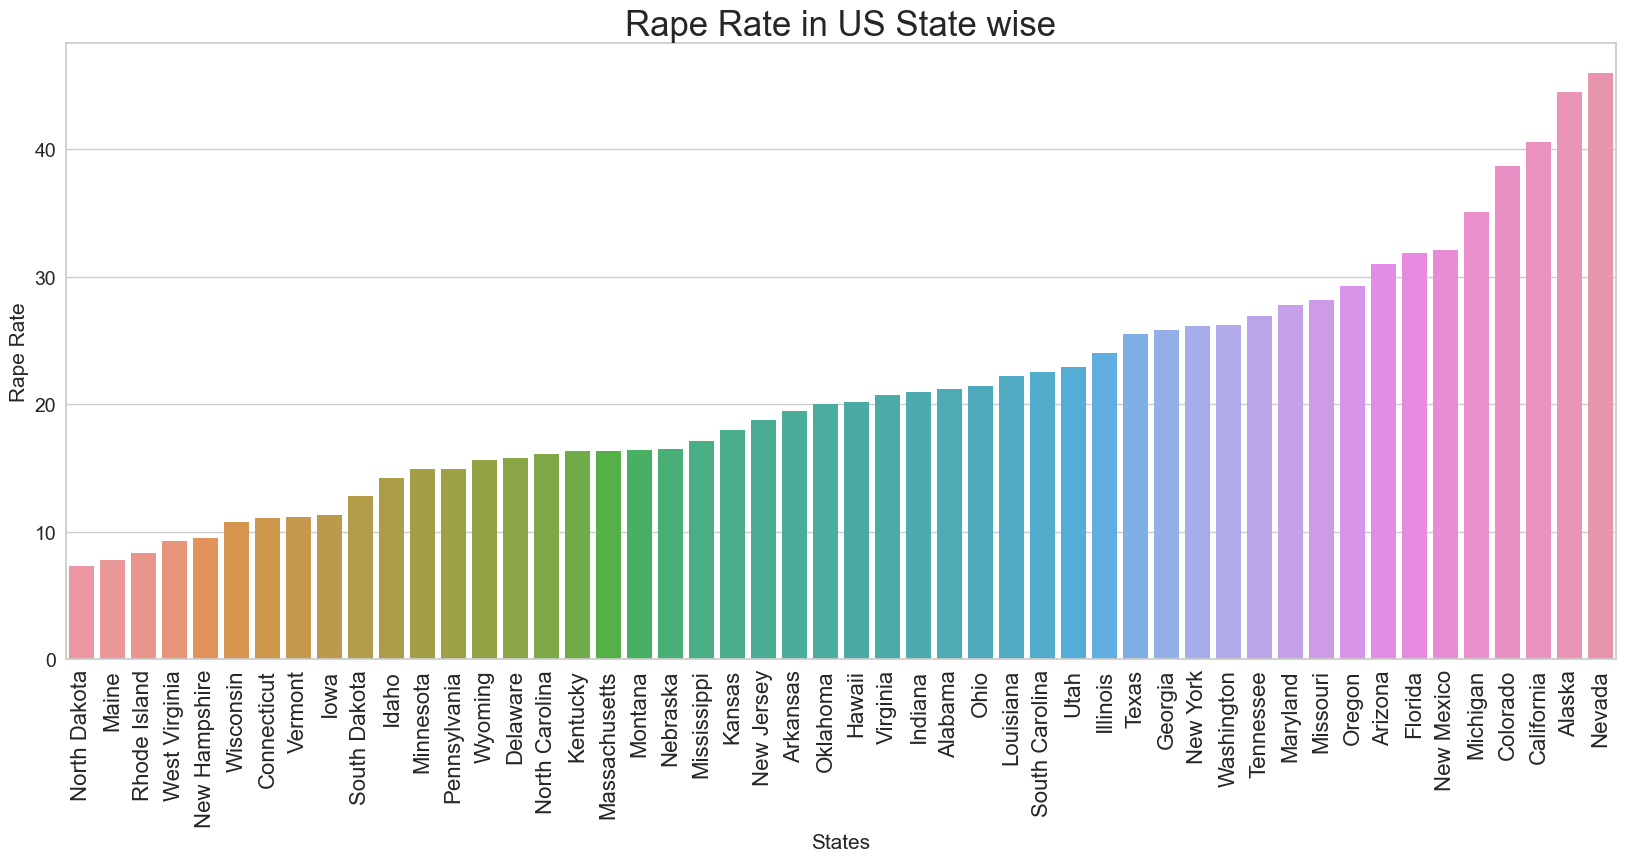

In [36]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sn.barplot(x='State',
            y="Rape", 
            data=data, 
            order=data.sort_values('Rape').State)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=25)
plt.show()

In [37]:
print('Top 10 States with Highest Rape Rate')
Rape_H=data.sort_values('Rape',ascending=False, ignore_index=True)
Rape_H.head(10)

Top 10 States with Highest Rape Rate


State  Murder  Assault  UrbanPop  Rape
0      Nevada    12.2      252        81  46.0
1      Alaska    10.0      263        48  44.5
2  California     9.0      276        91  40.6
3    Colorado     7.9      204        78  38.7
4    Michigan    12.1      255        74  35.1
5  New Mexico    11.4      285        70  32.1
6     Florida    15.4      335        80  31.9
7     Arizona     8.1      294        80  31.0
8      Oregon     4.9      159        67  29.3
9    Missouri     9.0      178        70  28.2

In [38]:
print('Top 10 States with Lowest Rape Rate')
Rape_L=data.sort_values('Rape',ascending=True, ignore_index=True)
Rape_L.head(10)

Top 10 States with Lowest Rape Rate


State  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1          Maine     2.1       83        51   7.8
2   Rhode Island     3.4      174        87   8.3
3  West Virginia     5.7       81        39   9.3
4  New Hampshire     2.1       57        56   9.5
5      Wisconsin     2.6       53        66  10.8
6    Connecticut     3.3      110        77  11.1
7        Vermont     2.2       48        32  11.2
8           Iowa     2.2       56        57  11.3
9   South Dakota     3.8       86        45  12.8

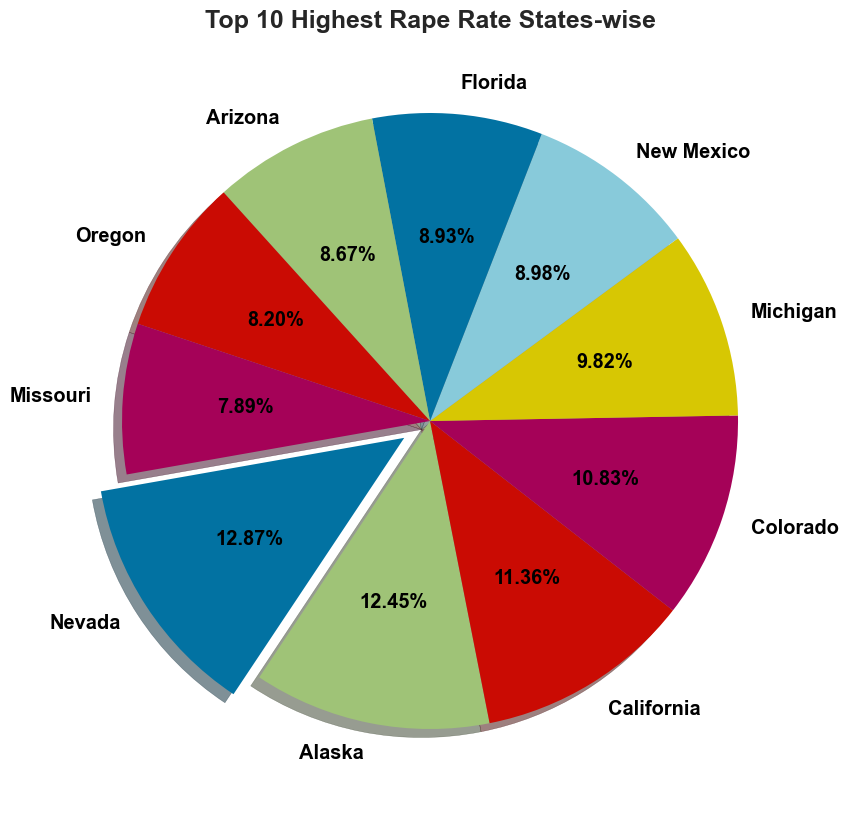

In [39]:
plt.figure(figsize = (10,10))
plt.pie(Rape_H.Rape[:10],
       labels=Rape_H.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()


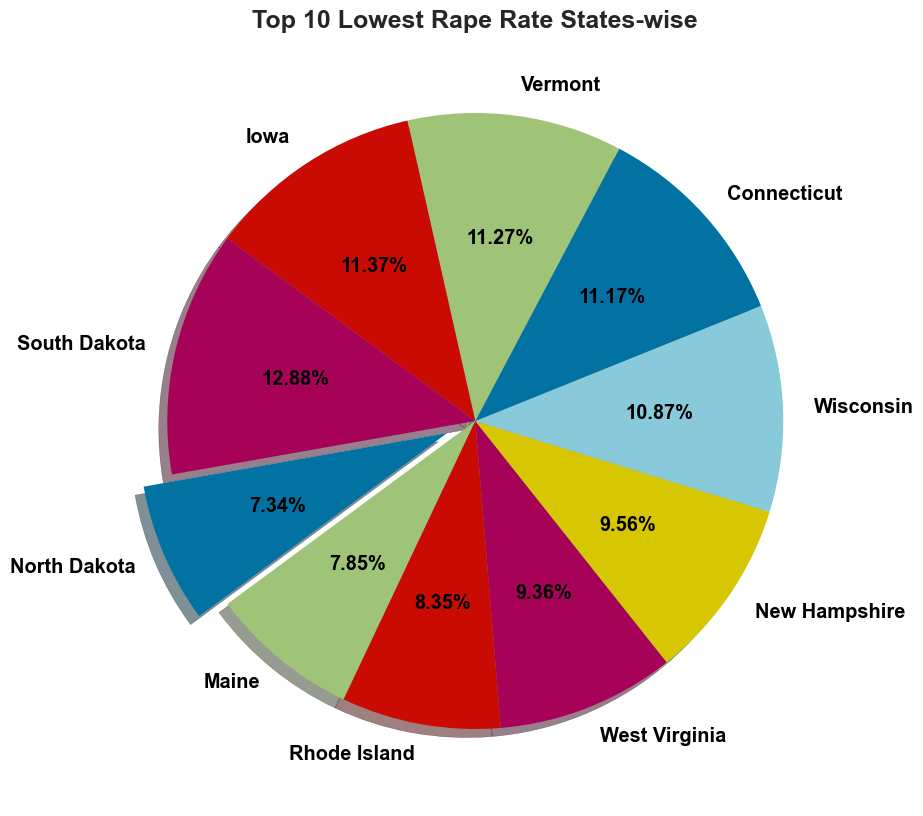

In [40]:
plt.figure(figsize = (10,10))
plt.pie(Rape_L.Rape[:10],
       labels=Rape_L.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()


#### Observations:
##### Highest Rape Rate : Nevada, Alaska and California
##### Lowest Rape Rate : North Dakota, Maine and Rhode Island.


## Insights of Urban Population Rate

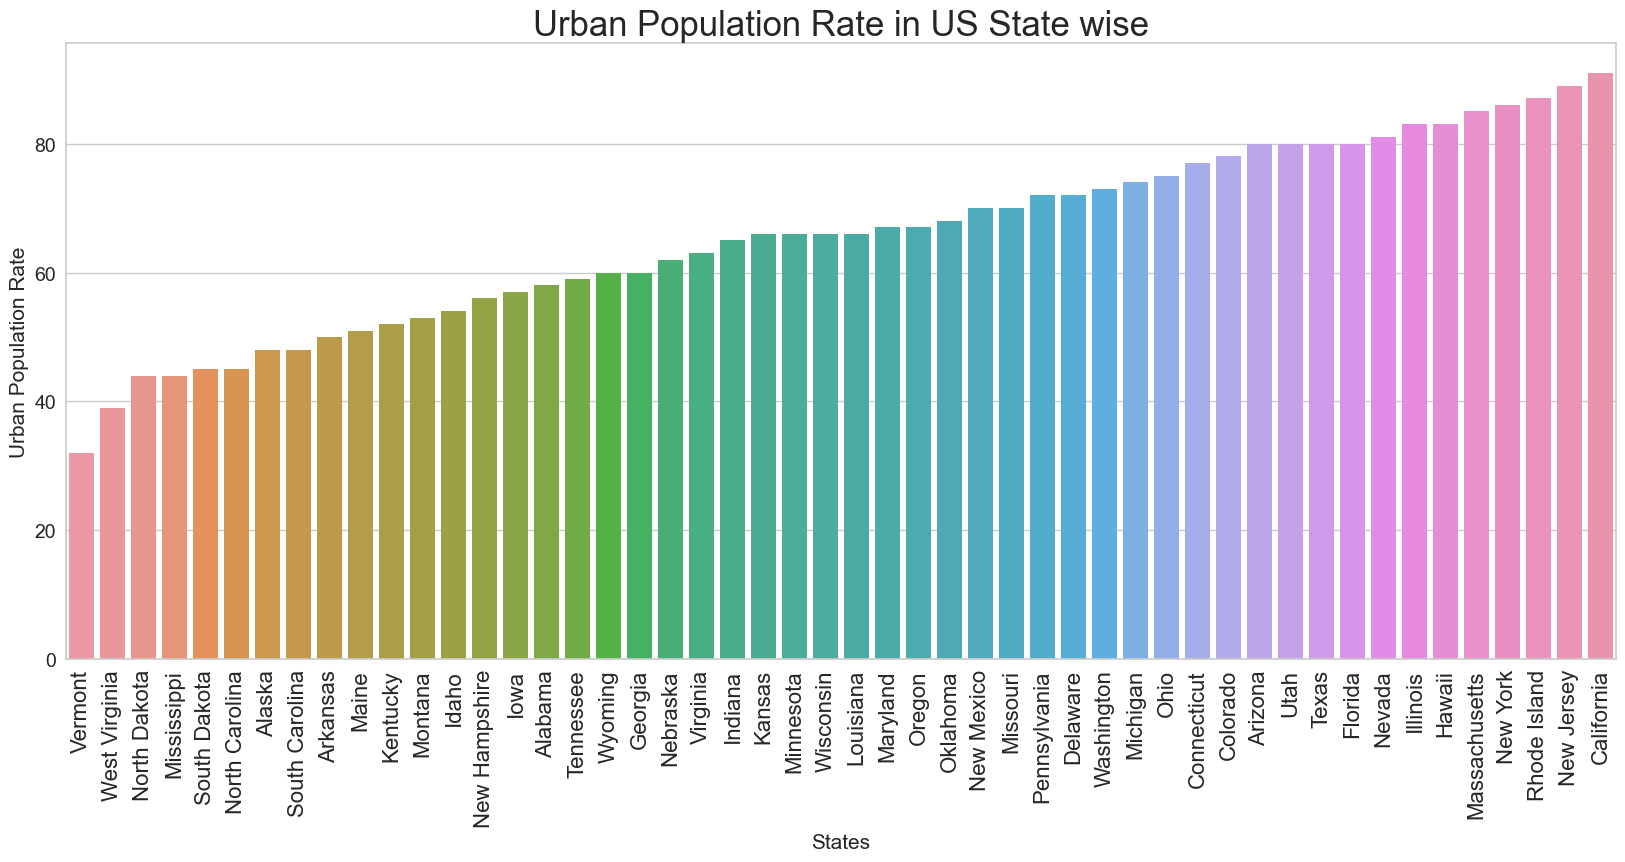

In [41]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sn.barplot(x='State',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').State)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=25)
plt.show()


In [42]:
print('Top 10 States with Highest Rape Rate')
UP_H=data.sort_values('UrbanPop',ascending=False, ignore_index=True)
UP_H.head(10)

Top 10 States with Highest Rape Rate


State  Murder  Assault  UrbanPop  Rape
0     California     9.0      276        91  40.6
1     New Jersey     7.4      159        89  18.8
2   Rhode Island     3.4      174        87   8.3
3       New York    11.1      254        86  26.1
4  Massachusetts     4.4      149        85  16.3
5         Hawaii     5.3       46        83  20.2
6       Illinois    10.4      249        83  24.0
7         Nevada    12.2      252        81  46.0
8          Texas    12.7      201        80  25.5
9        Arizona     8.1      294        80  31.0

In [43]:
print('Top 10 States with Lowest Rape Rate')
UP_L=data.sort_values('UrbanPop',ascending=True, ignore_index=True)
UP_L.head(10)

Top 10 States with Lowest Rape Rate


State  Murder  Assault  UrbanPop  Rape
0         Vermont     2.2       48        32  11.2
1   West Virginia     5.7       81        39   9.3
2    North Dakota     0.8       45        44   7.3
3     Mississippi    16.1      259        44  17.1
4    South Dakota     3.8       86        45  12.8
5  North Carolina    13.0      337        45  16.1
6          Alaska    10.0      263        48  44.5
7  South Carolina    14.4      279        48  22.5
8        Arkansas     8.8      190        50  19.5
9           Maine     2.1       83        51   7.8

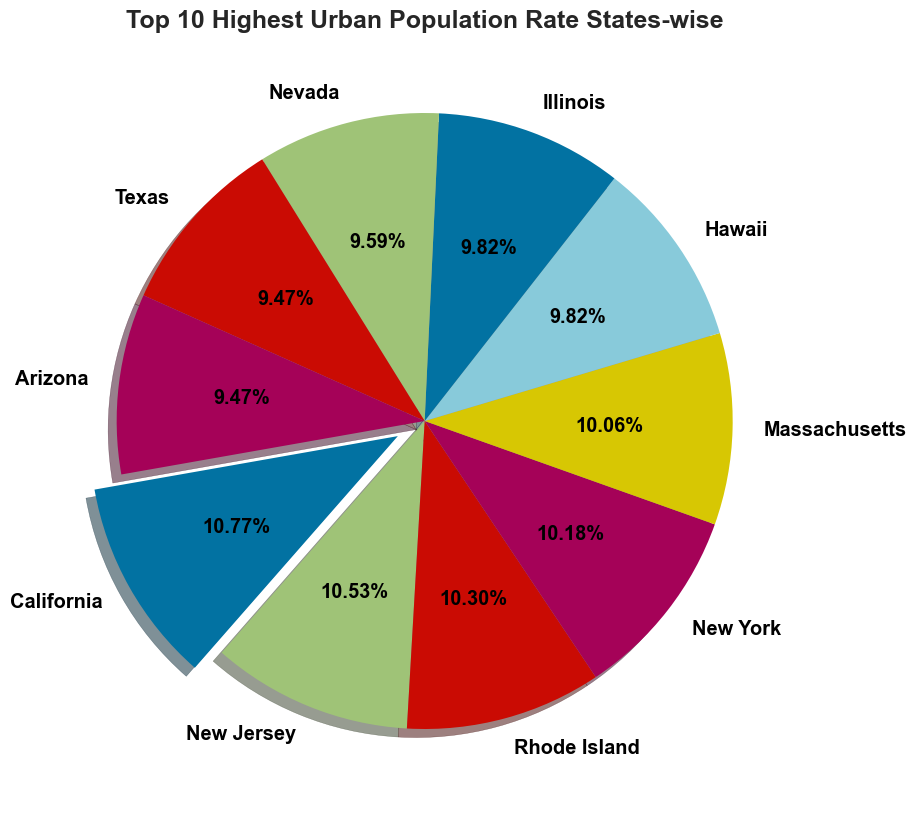

In [44]:
plt.figure(figsize = (10,10))
plt.pie(UP_H.UrbanPop[:10],
       labels=UP_H.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

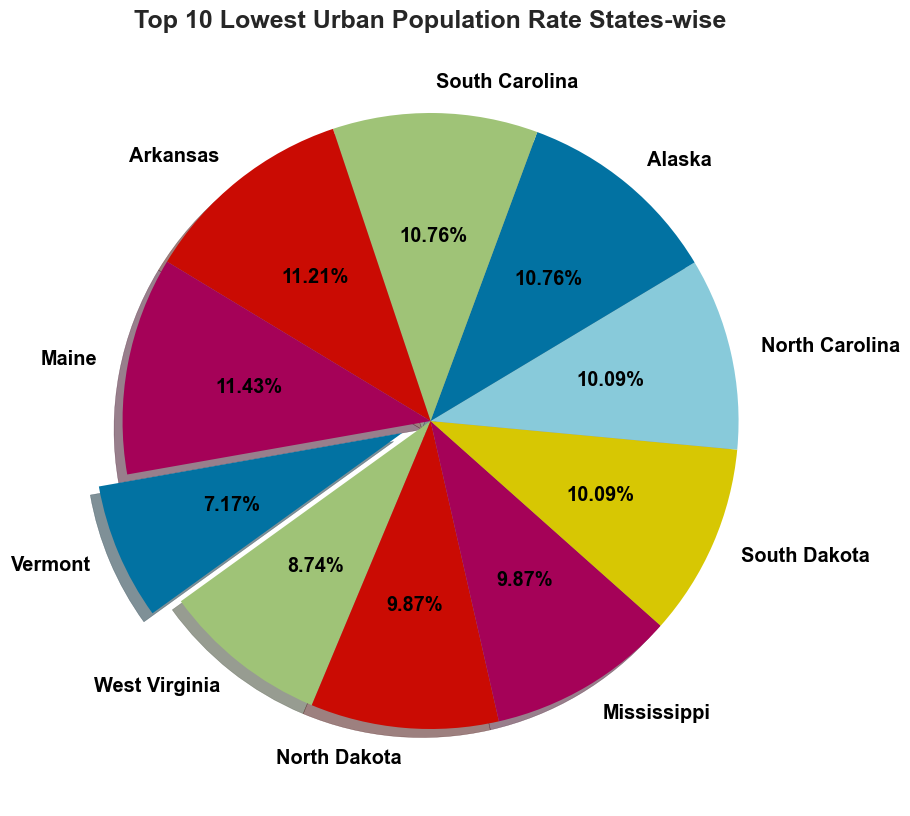

In [45]:
plt.figure(figsize = (10,10))
plt.pie(UP_L.UrbanPop[:10],
       labels=UP_L.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

#### Observations:
##### Highest Urban Population Rate : California, New Jersey and Rhode Island
##### Lowest Urban Population Rate : Vermount, West Virginia and North Dakota.

# KMeans Clustering
After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

1)Centroids of newly formed clusters do not change.
2)Points remain in the same cluster.
3)Maximum number of iterations are reached.

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot.

In [46]:
# Standardising the data
df = data.set_index('State')
df.head()

Murder  Assault  UrbanPop  Rape
State                                      
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [47]:
st_sc=StandardScaler()
std_df=st_sc.fit_transform(df)

print(std_df.shape)

(50, 4)


In [48]:
minmax=MinMaxScaler()
minmax_df=minmax.fit_transform(df)
minmax_df.shape

(50, 4)

### Elbow Method for Determining Cluster Amount
#### Standard Scaler Applied on Data


In [49]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0             1      200.000000
1             2      104.961633
2             3       80.115640
3             4       57.554259
4             5       50.234145
5             6       44.695340
6             7       40.380625
7             8       36.207336
8             9       32.376637

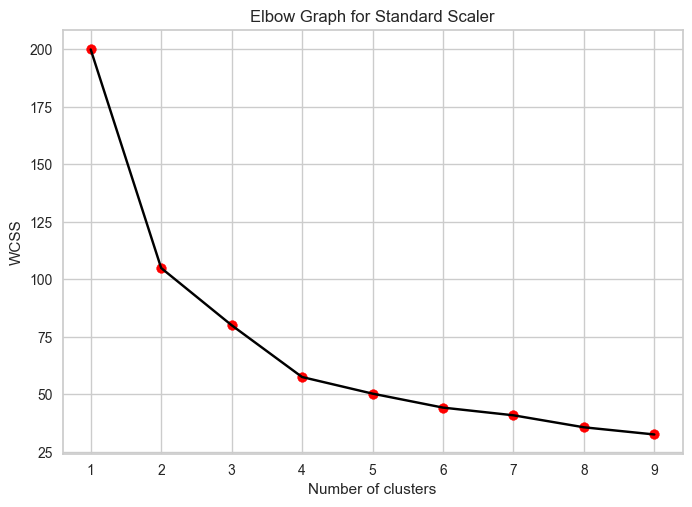

In [50]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Plot for Standard Scaler data


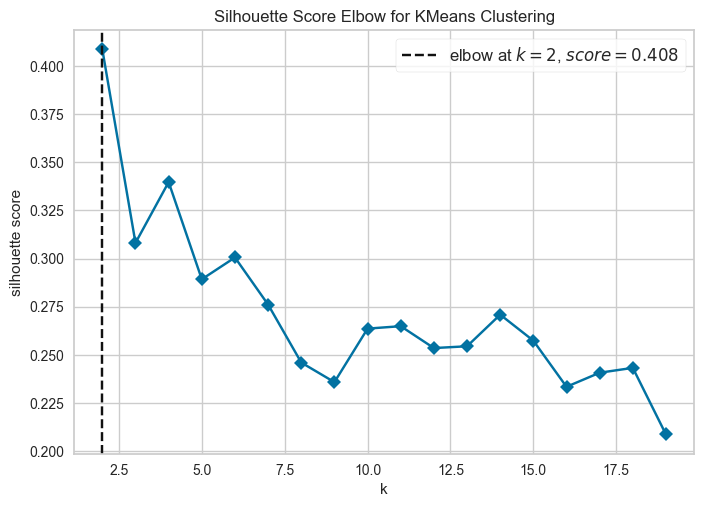

In [51]:
from sklearn.metrics import silhouette_score

# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

model = KMeans(random_state=42, max_iter=300, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualise = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualise.fit(std_df)    
visualise.poof()
plt.show()

In [52]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9,10]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)


For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.30813622648945616
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.2892698909578641
For n_clusters = 6 The average silhouette_score is : 0.3005771754063692
For n_clusters = 7 The average silhouette_score is : 0.2761342454285954
For n_clusters = 8 The average silhouette_score is : 0.24606152983626525
For n_clusters = 9 The average silhouette_score is : 0.2359060232768202
For n_clusters = 10 The average silhouette_score is : 0.2636703762849359


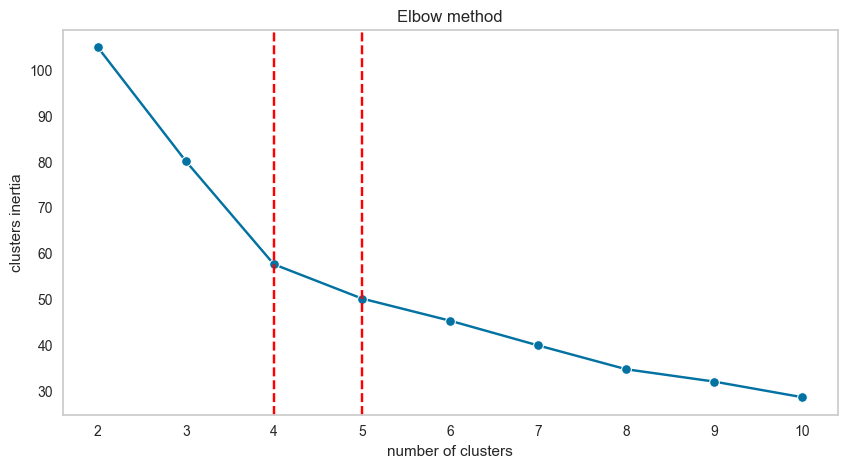

In [53]:

n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(10,5))
ax = sn.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364113
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804
For n_clusters = 10 The average silhouette_score is : 0.2652233759332704


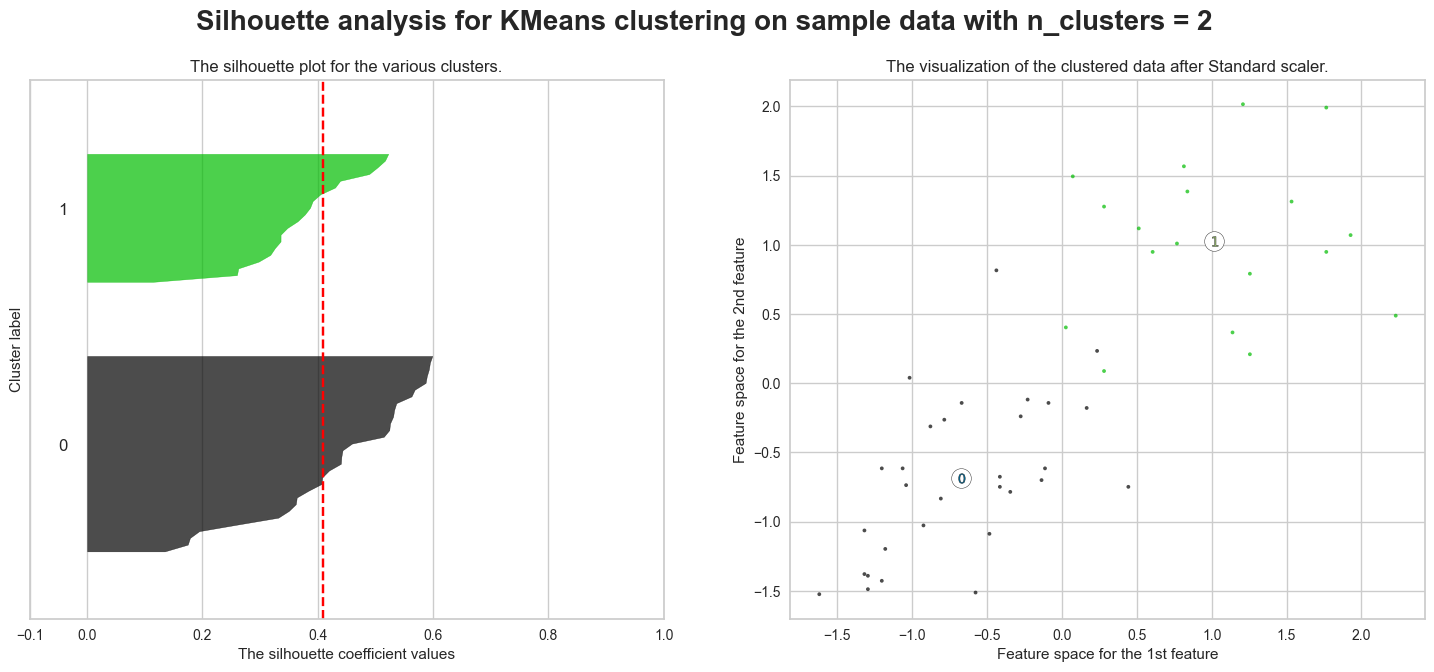

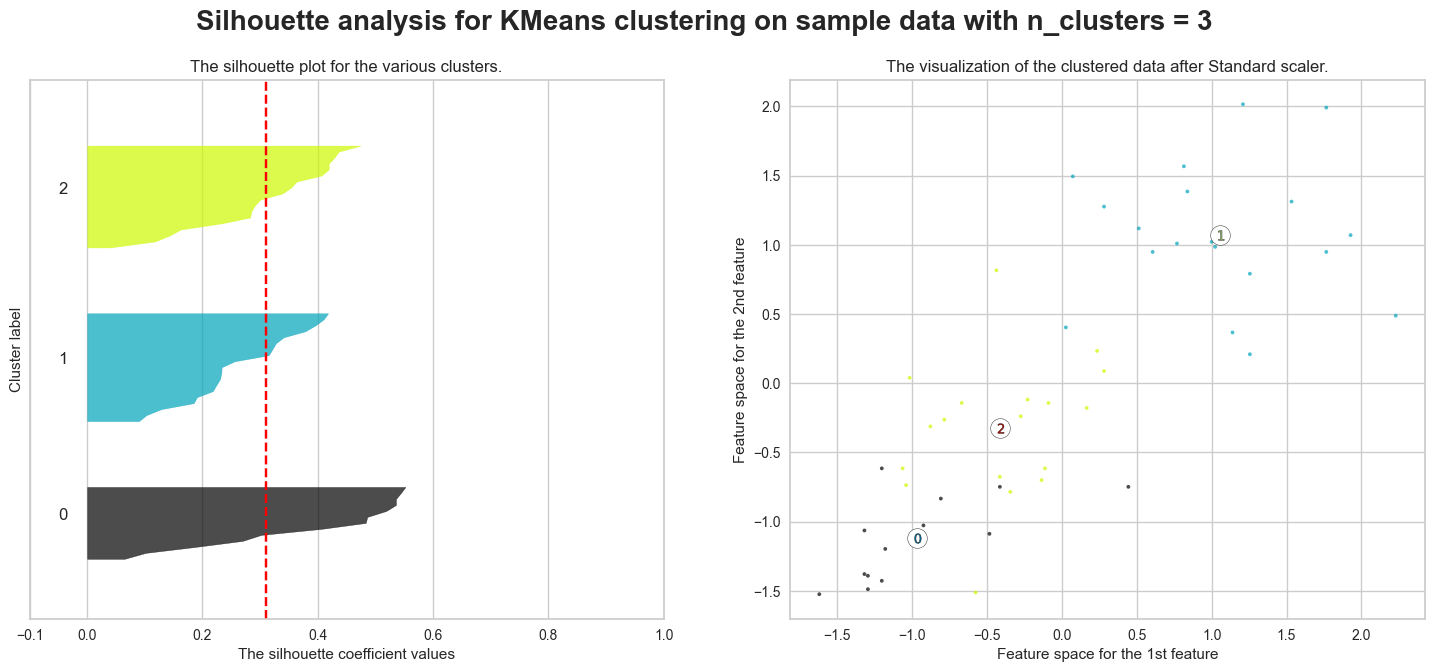

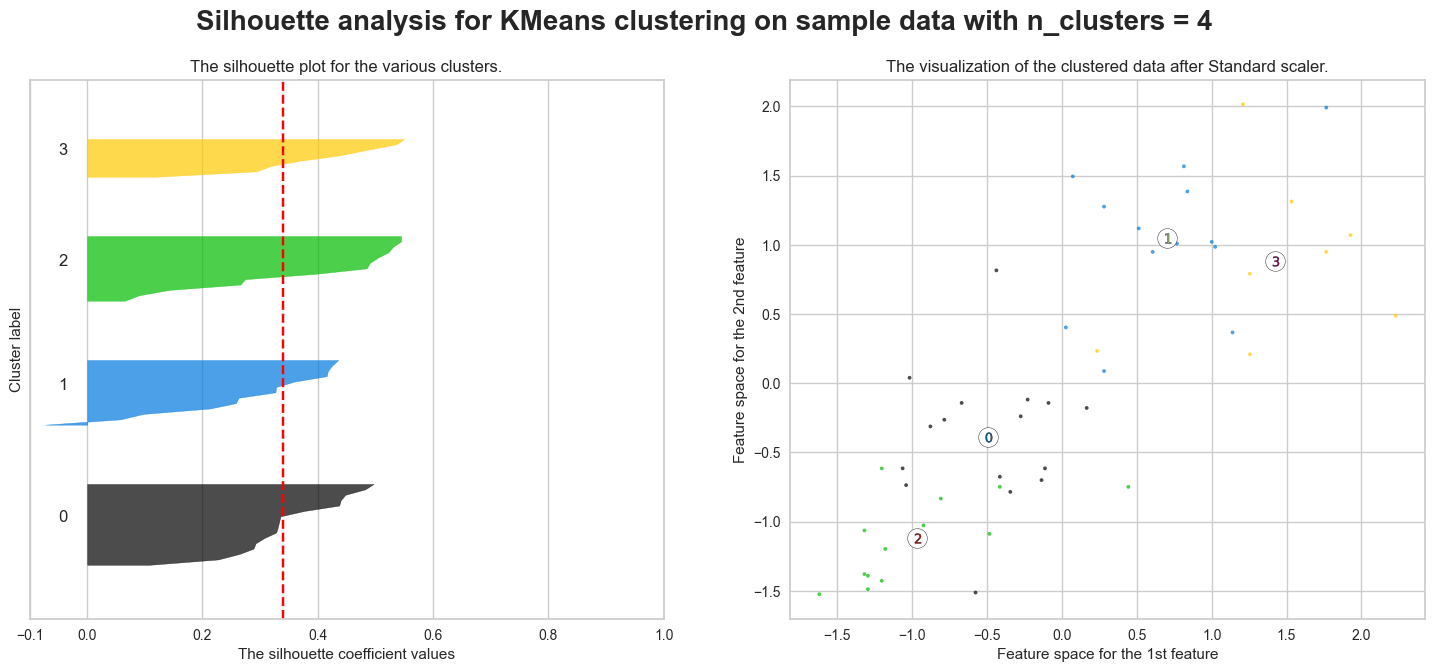

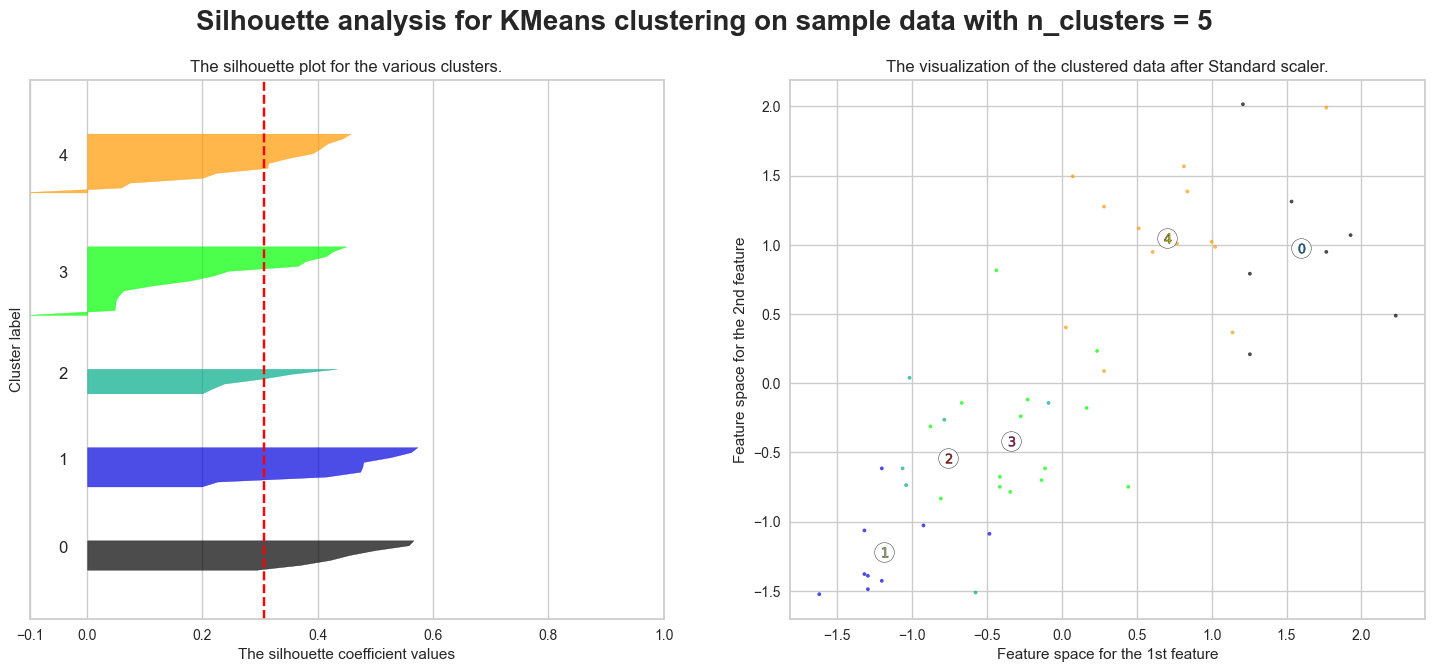

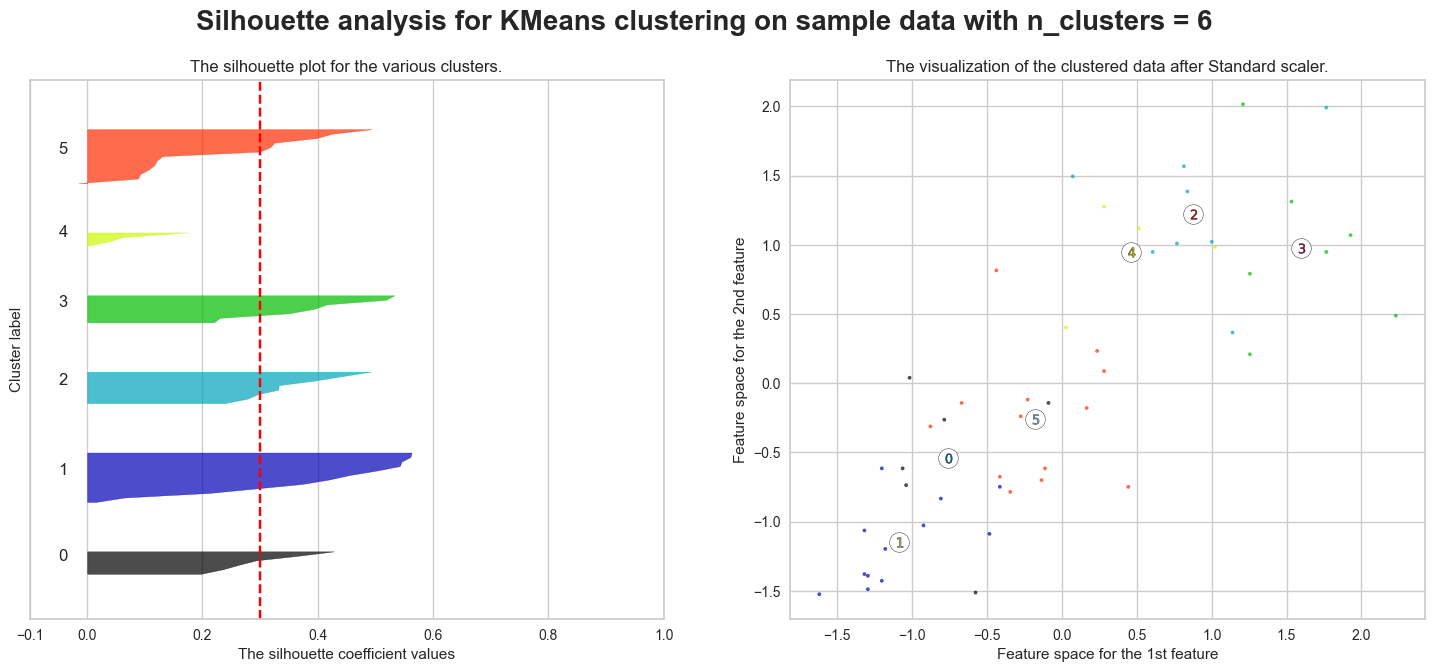

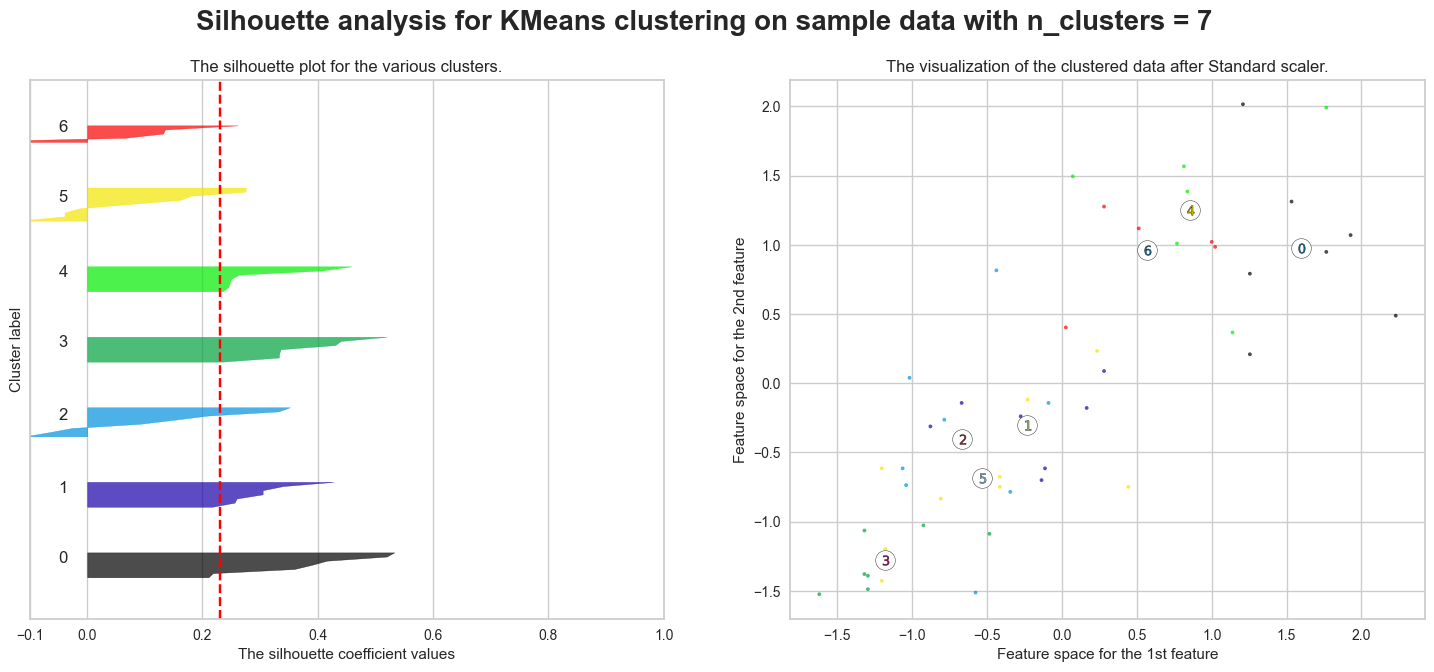

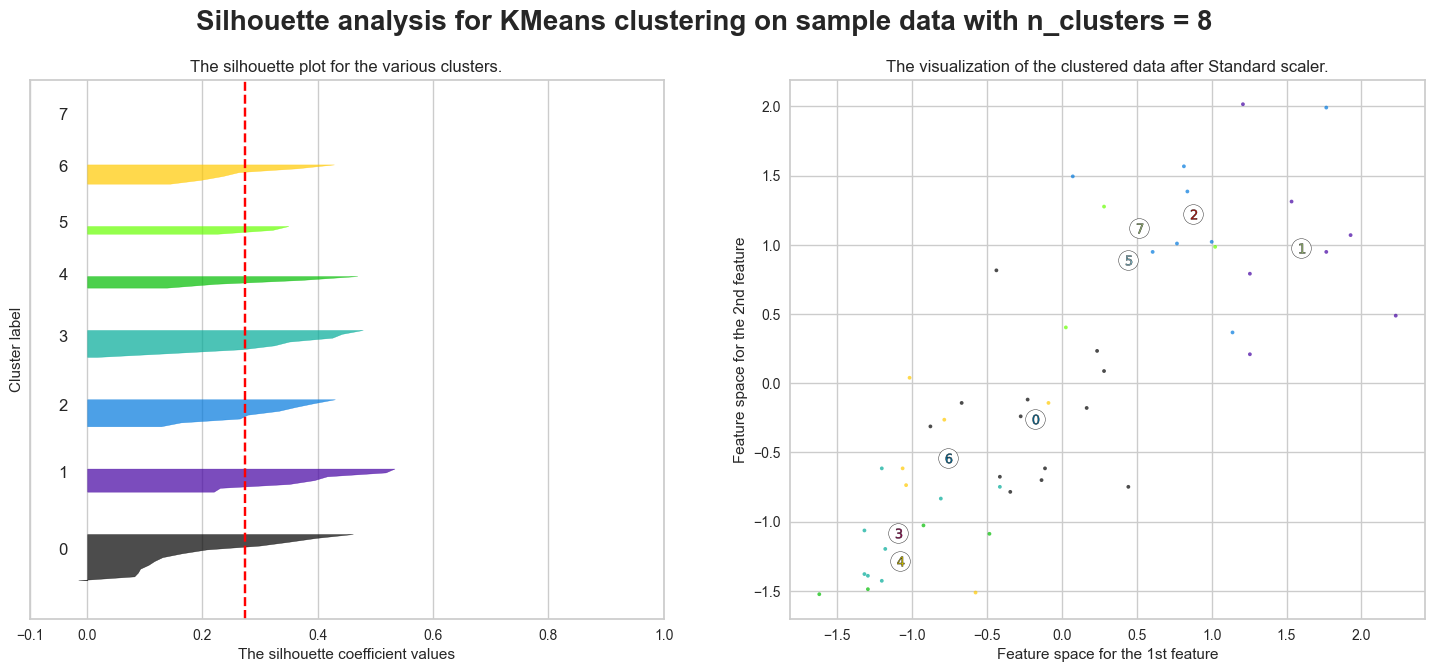

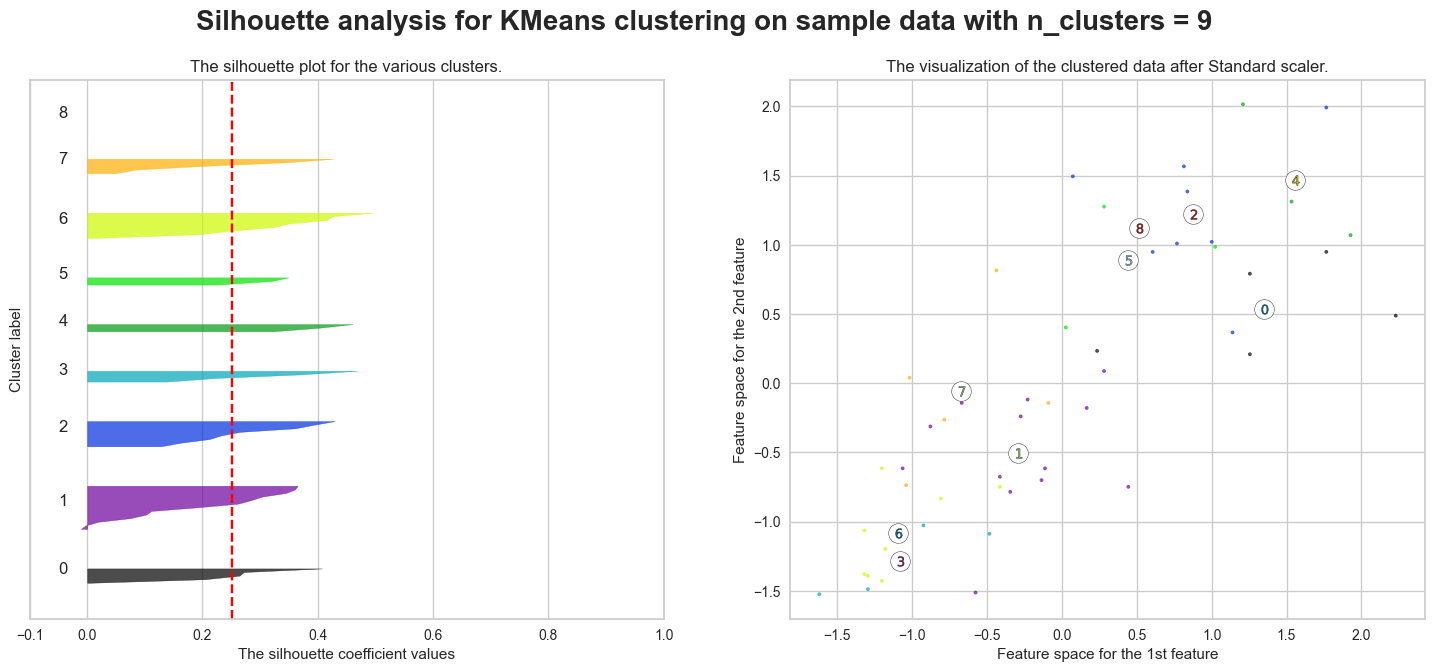

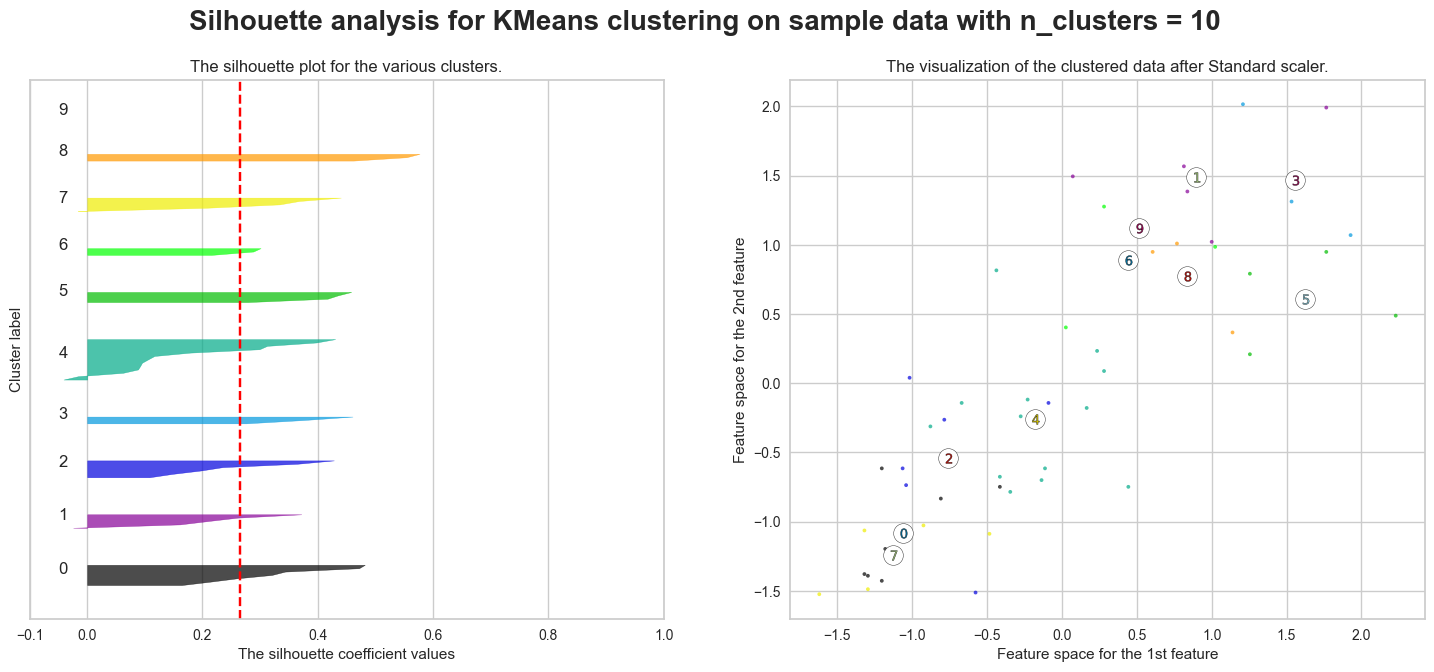

In [54]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
     # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=20, fontweight='bold')

plt.show()

### Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset


In [55]:

# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
print("Shape: ",y_predict_kmeans.shape)
print("Labels: ",model_kmeans.labels_)



Shape:  (50,)
Labels:  [1 1 1 2 1 1 2 2 1 1 2 0 1 2 0 2 0 1 0 1 2 1 0 1 2 0 0 1 0 2 1 1 1 0 2 2 2
 2 2 1 0 1 1 2 0 2 2 0 0 2]


In [56]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [57]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

80.0888613219962

In [58]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_
df


Murder  Assault  UrbanPop  Rape  Kmeans_label
State                                                        
Alabama           13.2      236        58  21.2             1
Alaska            10.0      263        48  44.5             1
Arizona            8.1      294        80  31.0             1
Arkansas           8.8      190        50  19.5             2
California         9.0      276        91  40.6             1
Colorado           7.9      204        78  38.7             1
Connecticut        3.3      110        77  11.1             2
Delaware           5.9      238        72  15.8             2
Florida           15.4      335        80  31.9             1
Georgia           17.4      211        60  25.8             1
Hawaii             5.3       46        83  20.2             2
Idaho              2.6      120        54  14.2             0
Illinois          10.4      249        83  24.0             1
Indiana            7.2      113        65  21.0             2
Iowa               2.2       56        57  11.3             0
Kansas             6.0      115        66  18.0             2
Kentucky           9.7      109        52  16.3             0
Louisiana         15.4      249        66  22.2             1
Maine              2.1       83        51   7.8             0
Maryland          11.3      300        67  27.8             1
Massachusetts      4.4      149        85  16.3             2
Michigan          12.1      255        74  35.1             1
Minnesota          2.7       72        66  14.9             0
Mississippi       16.1      259        44  17.1             1
Missouri           9.0      178        70  28.2             2
Montana            6.0      109        53  16.4             0
Nebraska           4.3      102        62  16.5             0
Nevada            12.2      252        81  46.0             1
New Hampshire      2.1       57        56   9.5             0
New Jersey         7.4      159        89  18.8             2
New Mexico        11.4      285        70  32.1             1
New York          11.1      254        86  26.1             1
North Carolina    13.0      337        45  16.1             1
North Dakota       0.8       45        44   7.3             0
Ohio               7.3      120        75  21.4             2
Oklahoma           6.6      151        68  20.0             2
Oregon             4.9      159        67  29.3             2
Pennsylvania       6.3      106        72  14.9             2
Rhode Island       3.4      174        87   8.3             2
South Carolina    14.4      279        48  22.5             1
South Dakota       3.8       86        45  12.8             0
Tennessee         13.2      188        59  26.9             1
Texas             12.7      201        80  25.5             1
Utah               3.2      120        80  22.9             2
Vermont            2.2       48        32  11.2             0
Virginia           8.5      156        63  20.7             2
Washington         4.0      145        73  26.2             2
West Virginia      5.7       81        39   9.3             0
Wisconsin          2.6       53        66  10.8             0
Wyoming            6.8      161        60  15.6             2

In [59]:
# Group data by Clusters (K=6)

df.groupby('Kmeans_label').agg(['mean'])

Murder     Assault   UrbanPop       Rape
                   mean        mean       mean       mean
Kmeans_label                                             
0              3.600000   78.538462  52.076923  12.176923
1             12.331579  259.315789  68.315789  29.215789
2              6.016667  143.888889  72.333333  19.344444

In [60]:
print(df[df['Kmeans_label']==0].count())
df[df['Kmeans_label']==0]

Murder          13
Assault         13
UrbanPop        13
Rape            13
Kmeans_label    13
dtype: int64


Murder  Assault  UrbanPop  Rape  Kmeans_label
State                                                       
Idaho             2.6      120        54  14.2             0
Iowa              2.2       56        57  11.3             0
Kentucky          9.7      109        52  16.3             0
Maine             2.1       83        51   7.8             0
Minnesota         2.7       72        66  14.9             0
Montana           6.0      109        53  16.4             0
Nebraska          4.3      102        62  16.5             0
New Hampshire     2.1       57        56   9.5             0
North Dakota      0.8       45        44   7.3             0
South Dakota      3.8       86        45  12.8             0
Vermont           2.2       48        32  11.2             0
West Virginia     5.7       81        39   9.3             0
Wisconsin         2.6       53        66  10.8             0

In [61]:
print(df[df['Kmeans_label']==1].count())
df[df['Kmeans_label']==1]


Murder          19
Assault         19
UrbanPop        19
Rape            19
Kmeans_label    19
dtype: int64


Murder  Assault  UrbanPop  Rape  Kmeans_label
State                                                        
Alabama           13.2      236        58  21.2             1
Alaska            10.0      263        48  44.5             1
Arizona            8.1      294        80  31.0             1
California         9.0      276        91  40.6             1
Colorado           7.9      204        78  38.7             1
Florida           15.4      335        80  31.9             1
Georgia           17.4      211        60  25.8             1
Illinois          10.4      249        83  24.0             1
Louisiana         15.4      249        66  22.2             1
Maryland          11.3      300        67  27.8             1
Michigan          12.1      255        74  35.1             1
Mississippi       16.1      259        44  17.1             1
Nevada            12.2      252        81  46.0             1
New Mexico        11.4      285        70  32.1             1
New York          11.1      254        86  26.1             1
North Carolina    13.0      337        45  16.1             1
South Carolina    14.4      279        48  22.5             1
Tennessee         13.2      188        59  26.9             1
Texas             12.7      201        80  25.5             1

In [62]:
print(df[df['Kmeans_label']==2].count())
df[df['Kmeans_label']==2]

Murder          18
Assault         18
UrbanPop        18
Rape            18
Kmeans_label    18
dtype: int64


Murder  Assault  UrbanPop  Rape  Kmeans_label
State                                                       
Arkansas          8.8      190        50  19.5             2
Connecticut       3.3      110        77  11.1             2
Delaware          5.9      238        72  15.8             2
Hawaii            5.3       46        83  20.2             2
Indiana           7.2      113        65  21.0             2
Kansas            6.0      115        66  18.0             2
Massachusetts     4.4      149        85  16.3             2
Missouri          9.0      178        70  28.2             2
New Jersey        7.4      159        89  18.8             2
Ohio              7.3      120        75  21.4             2
Oklahoma          6.6      151        68  20.0             2
Oregon            4.9      159        67  29.3             2
Pennsylvania      6.3      106        72  14.9             2
Rhode Island      3.4      174        87   8.3             2
Utah              3.2      120        80  22.9             2
Virginia          8.5      156        63  20.7             2
Washington        4.0      145        73  26.2             2
Wyoming           6.8      161        60  15.6             2

SilhouetteVisualizer(ax=<AxesSubplot: >,
                     colors=['#922B21', '#5B2C6F', '#1B4F72', '#32a84a'],
                     estimator=KMeans(n_clusters=3, random_state=0))

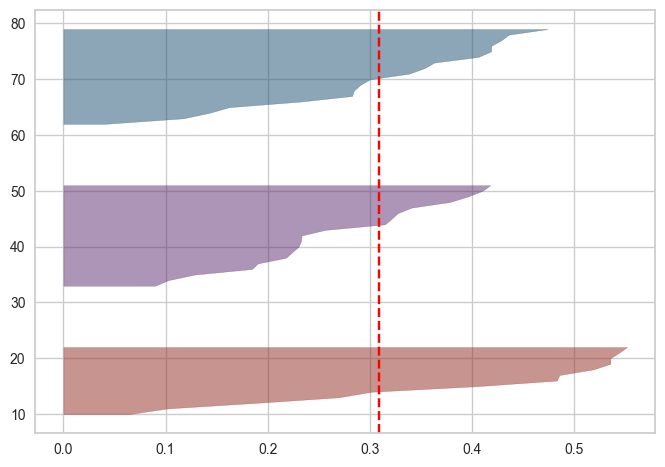

In [63]:
from yellowbrick.cluster import SilhouetteVisualizer

sil_visualizer1 = SilhouetteVisualizer(model_kmeans, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_df)



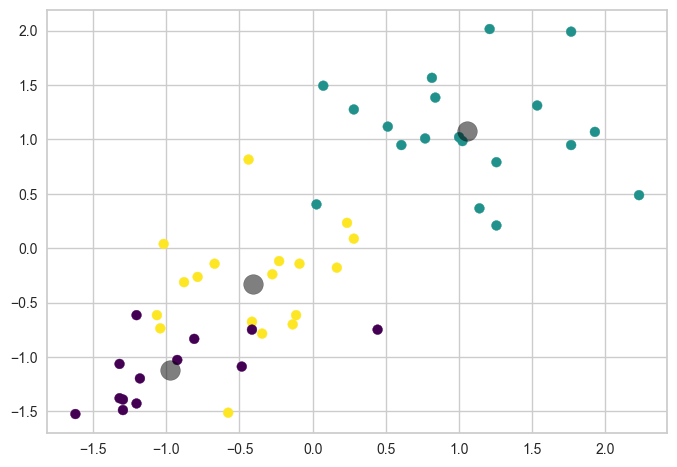

In [64]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(std_df[:,0], std_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)


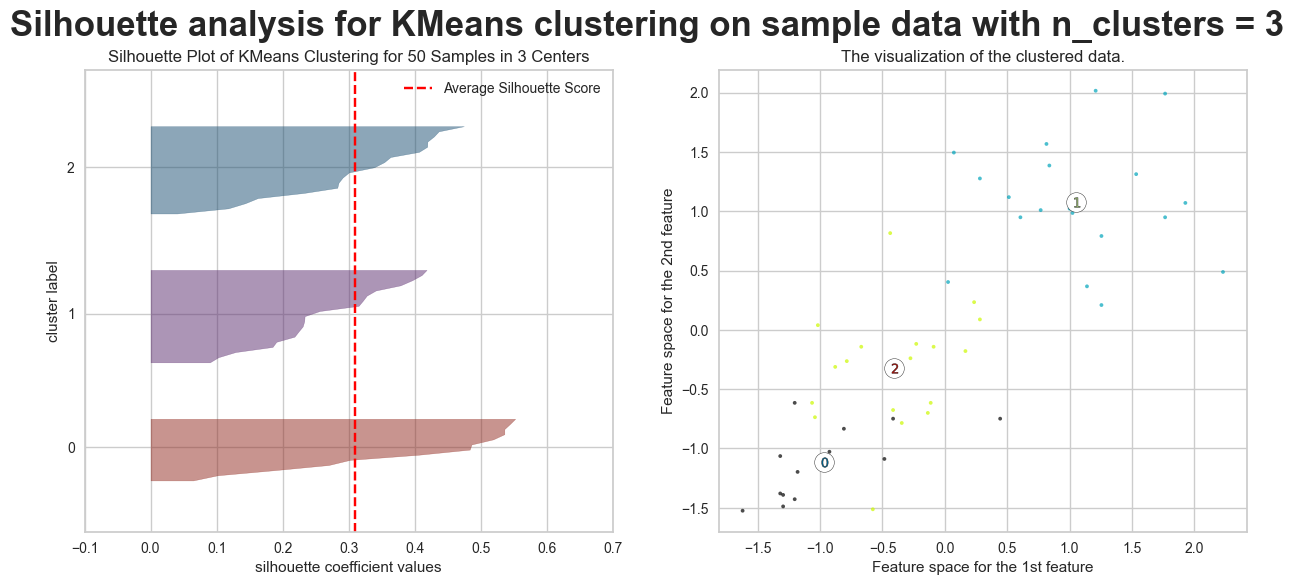

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 50 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(15,6)
sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed
c1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 6 is number of clusters
ax2.scatter(std_df[:, 0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=c1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_

# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),fontsize=25, fontweight='bold')

sil_visualizer1.show()

#### Observations:
The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone

## Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [66]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0             1       13.184123
1             2        6.596894
2             3        5.010878
3             4        3.690820
4             5        3.202743
5             6        2.915978
6             7        2.568796
7             8        2.304747
8             9        2.041029

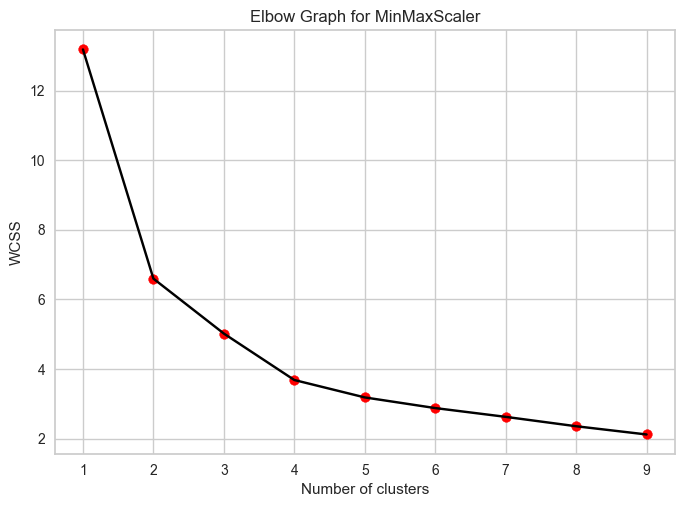

In [67]:
wcss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Plot for MinMaxScaler data


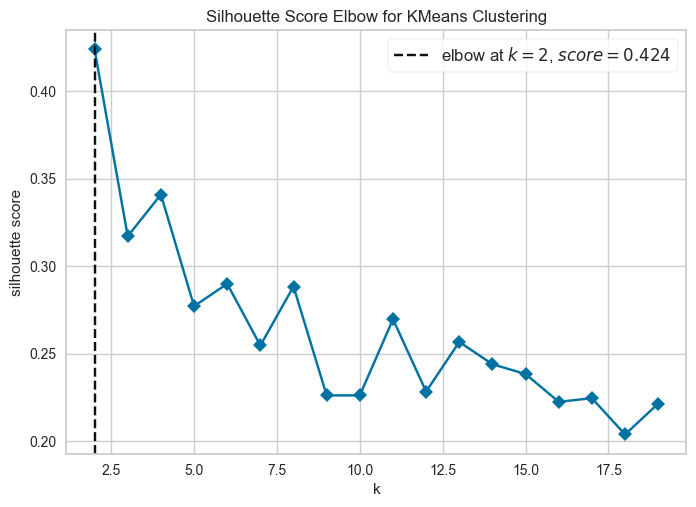

In [68]:
model = KMeans(random_state=42, max_iter=300, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [69]:
clust_list = [2,3,4,5,6,7,8,9,10]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)


For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.31705482042661864
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.27717216976092157
For n_clusters = 6 The average silhouette_score is : 0.2899261135608551
For n_clusters = 7 The average silhouette_score is : 0.2547326884584678
For n_clusters = 8 The average silhouette_score is : 0.2883826443108348
For n_clusters = 9 The average silhouette_score is : 0.22626313950689014
For n_clusters = 10 The average silhouette_score is : 0.22626536048126922


For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.31047828422452595
For n_clusters = 6 The average silhouette_score is : 0.29304639988963094
For n_clusters = 7 The average silhouette_score is : 0.28821826266004197
For n_clusters = 8 The average silhouette_score is : 0.2739250289741455
For n_clusters = 9 The average silhouette_score is : 0.27503190107418357
For n_clusters = 10 The average silhouette_score is : 0.22700753572456014


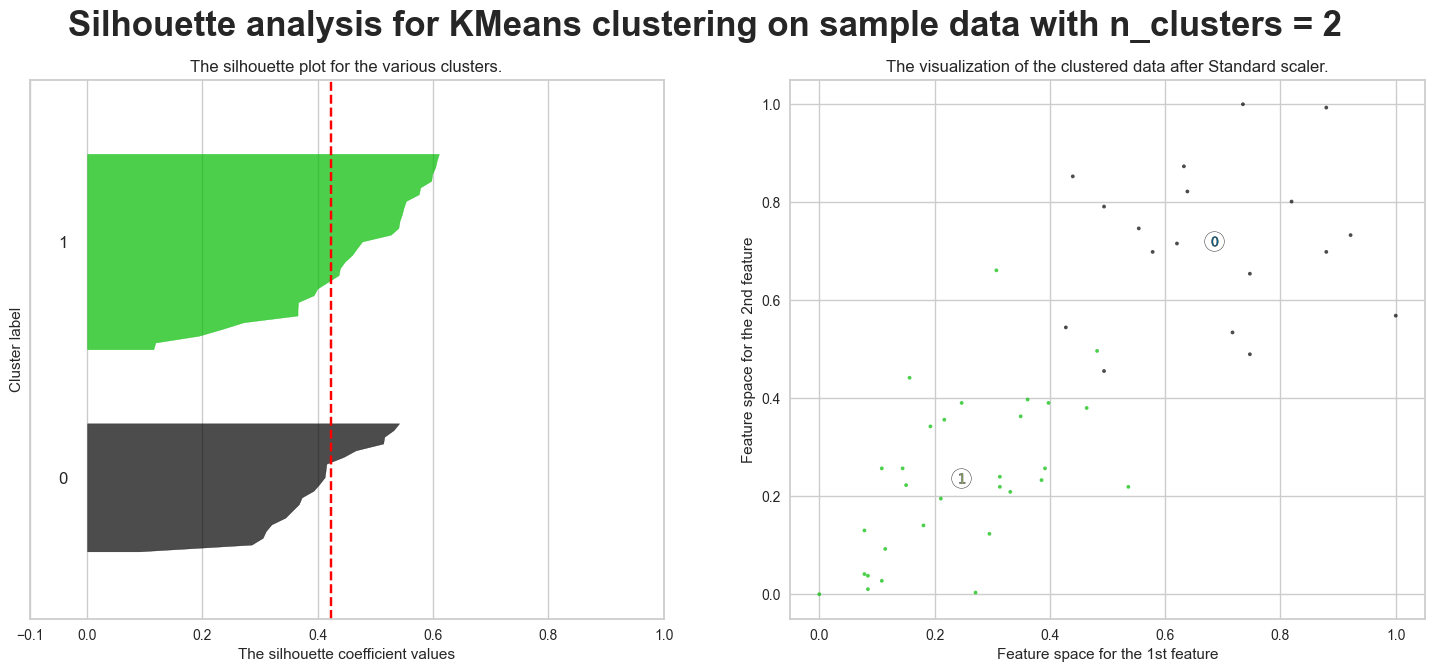

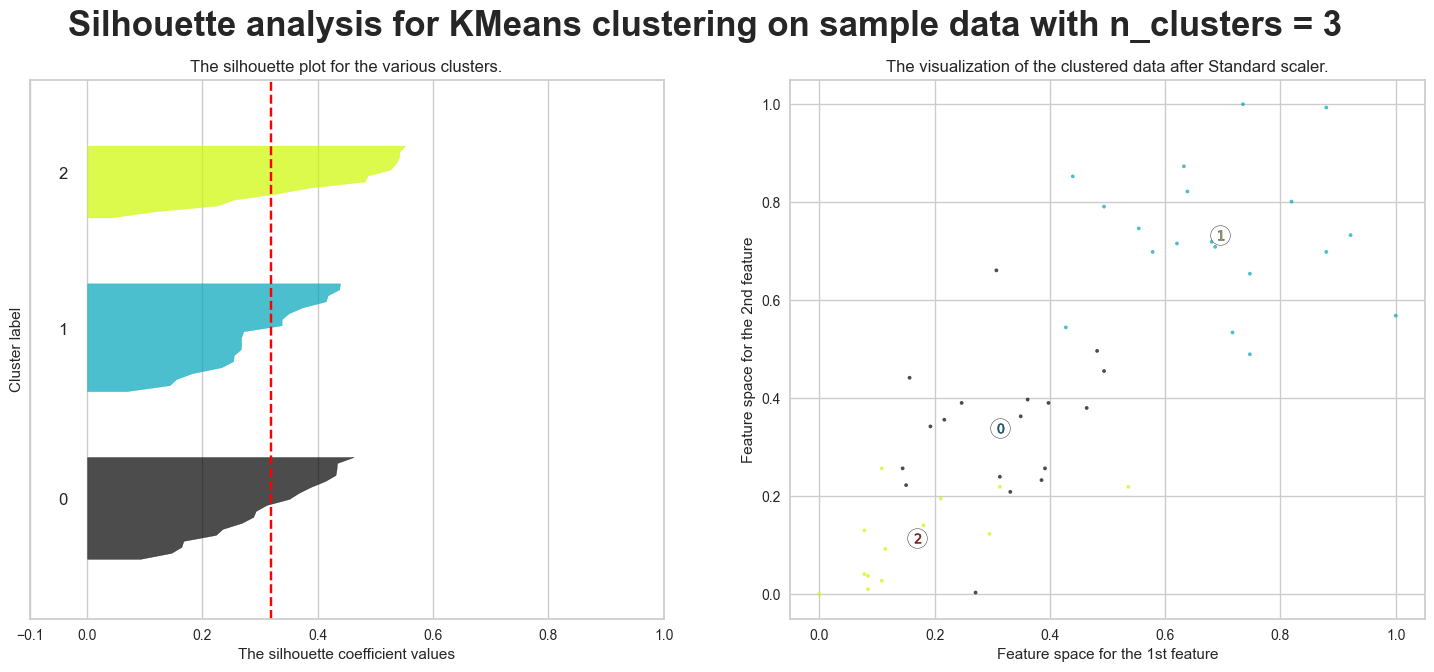

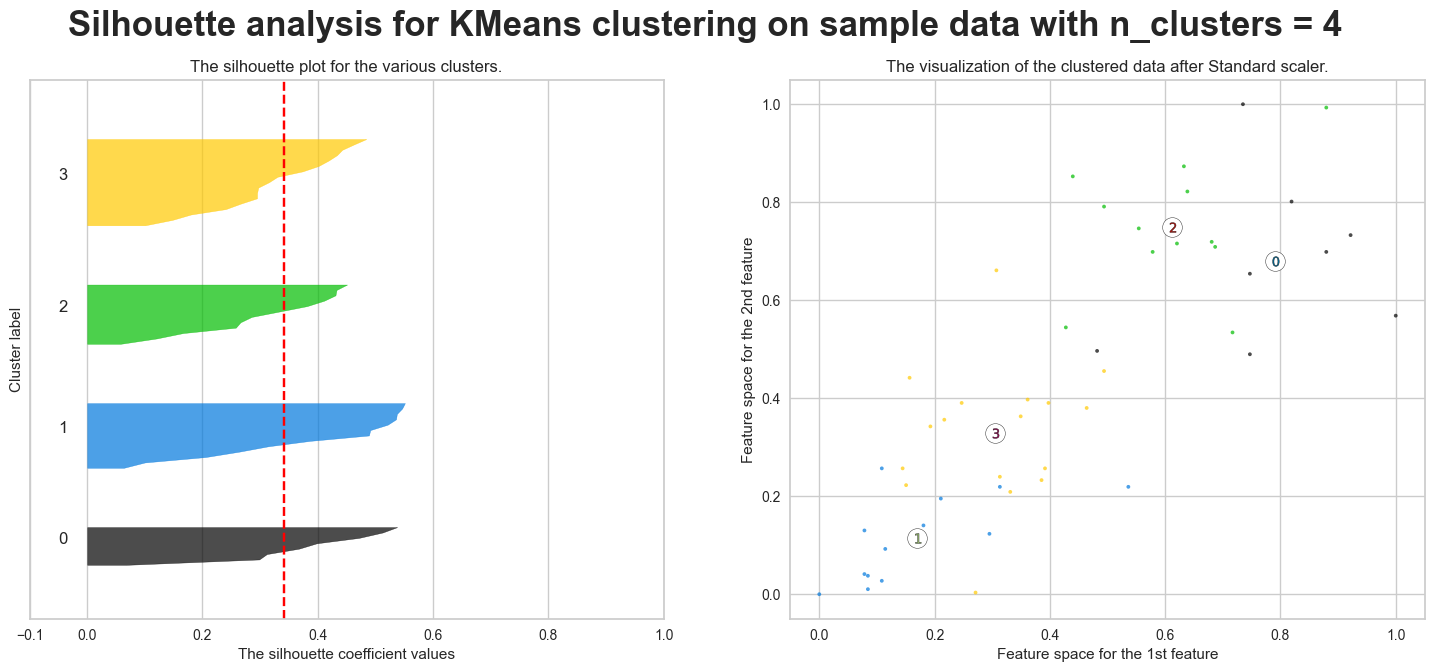

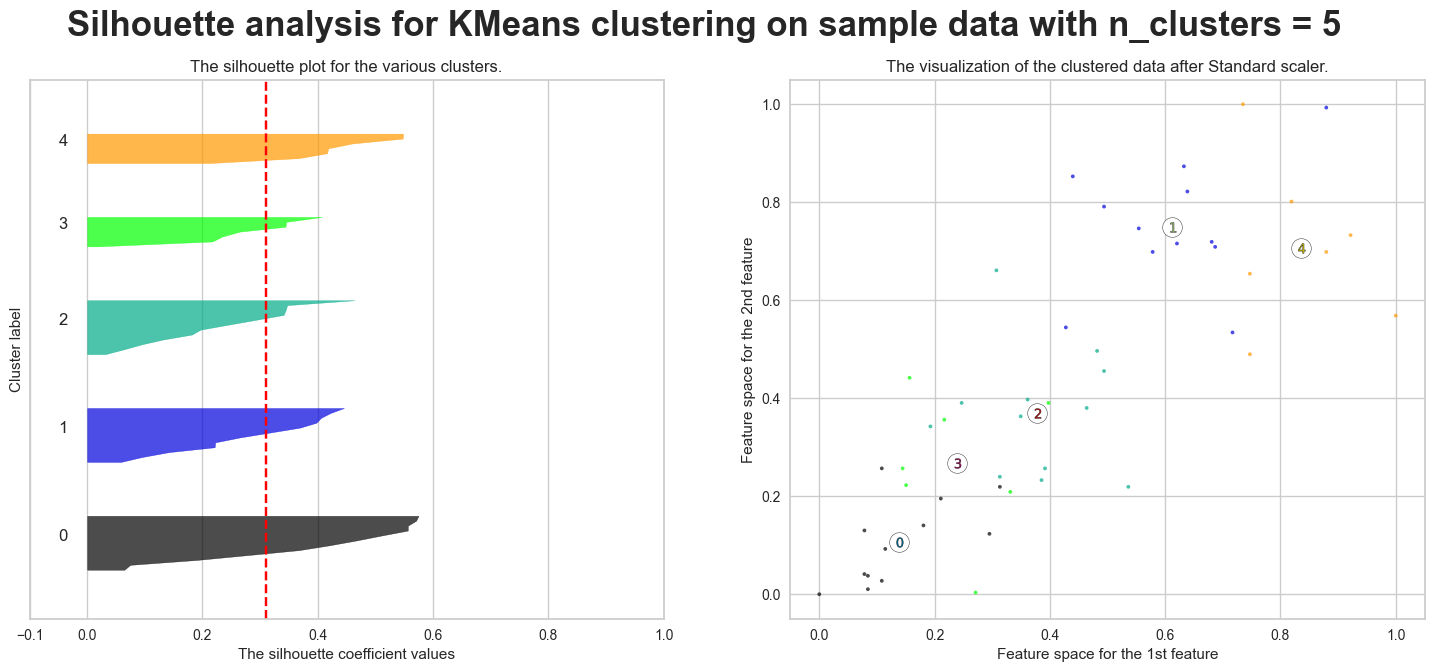

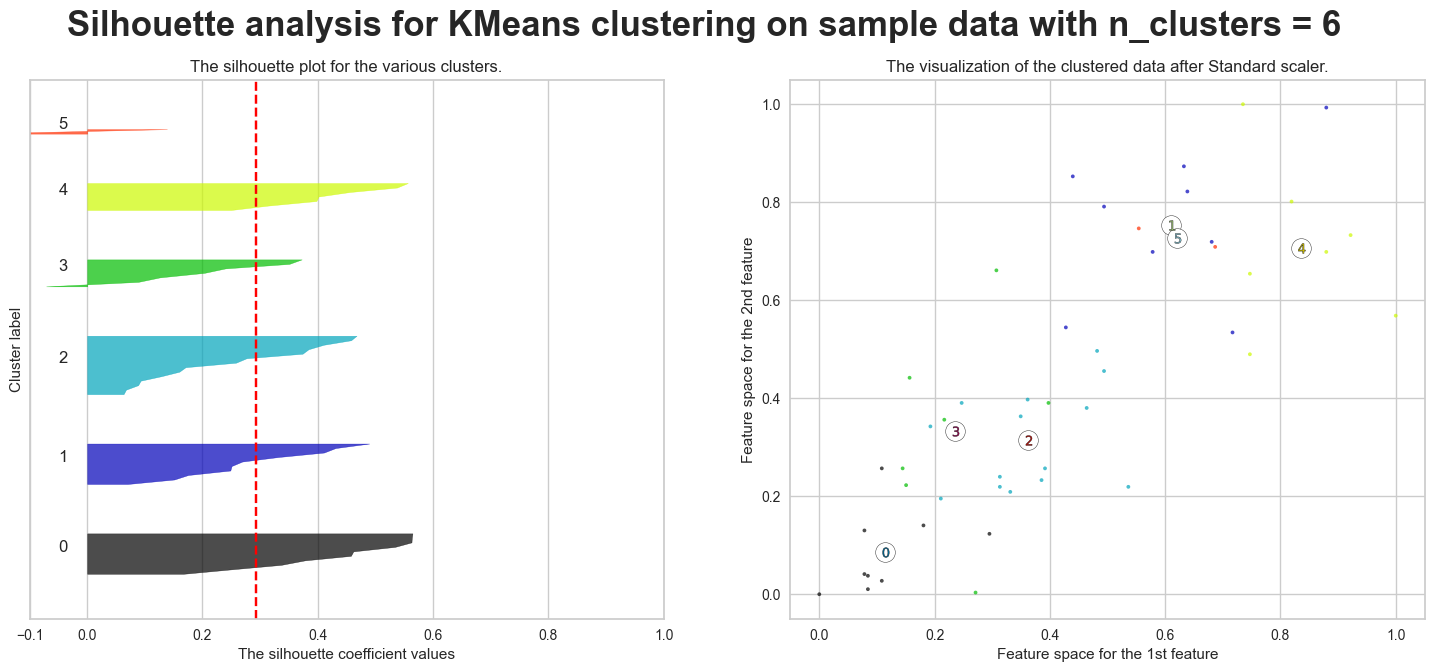

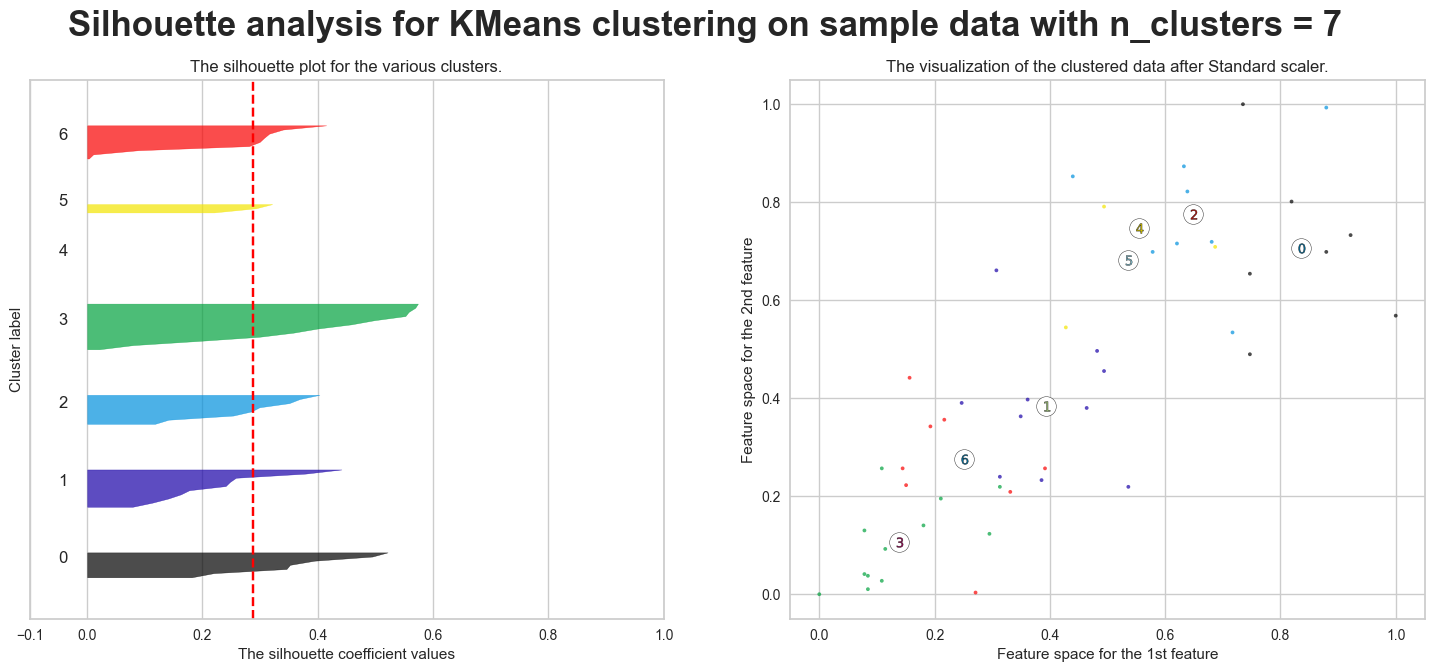

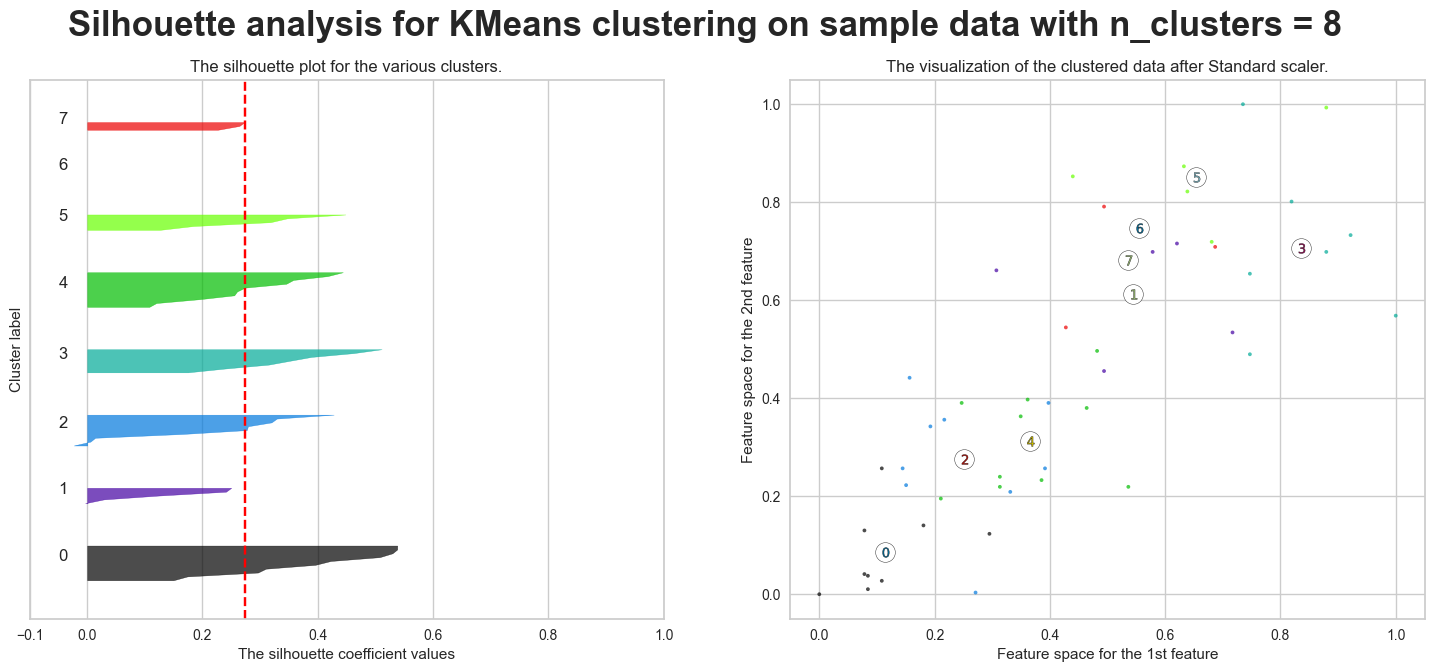

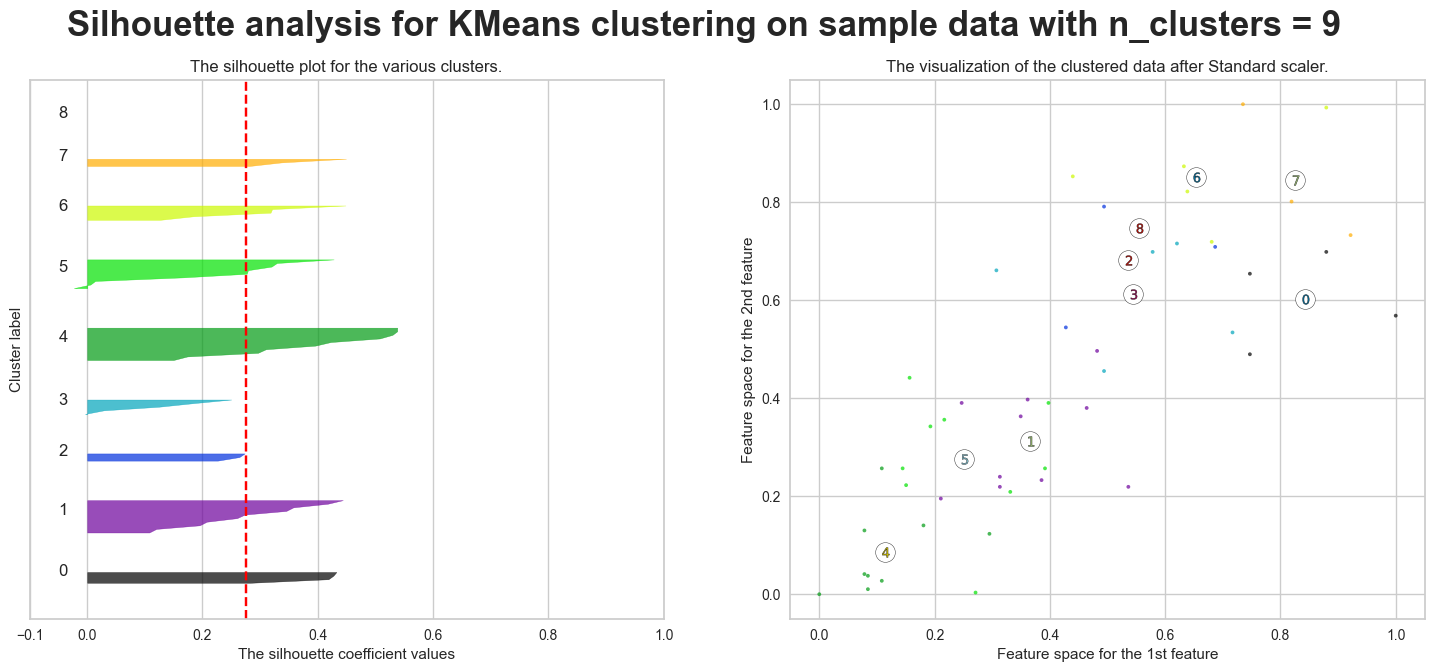

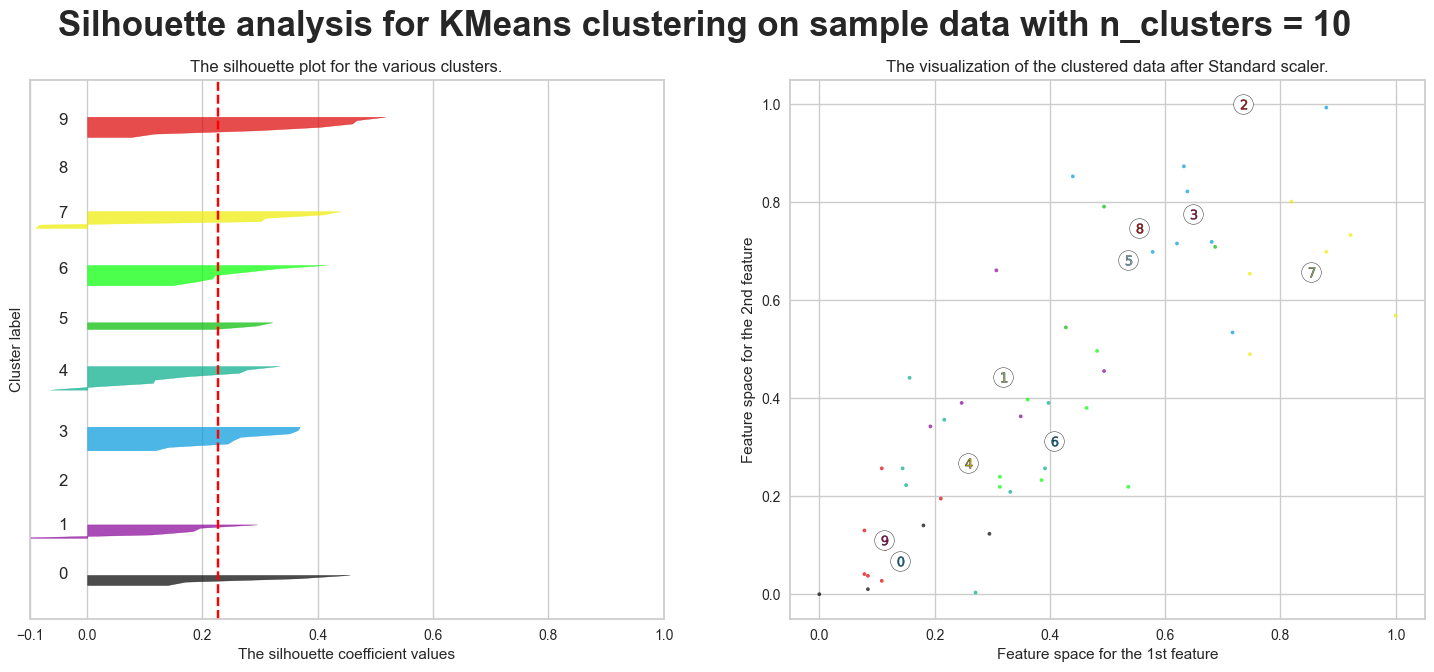

In [70]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,0], minmax_df[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

     # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=25, fontweight='bold')
    
plt.show()


##### Conclusion:
    
According the the silhouette score of:

The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.42.

If we check silhouette score with Normalize data kmeans model 0.42>0.40 .Best score always close to +1.

### Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

In [71]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(50,)

In [72]:
y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [73]:
model_kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [74]:
model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [75]:
model_kmeans.inertia_

6.596893867946196

In [76]:
df['Kmeans_label_M'] = model_kmeans.labels_

In [77]:
df

Murder  Assault  UrbanPop  Rape  Kmeans_label  Kmeans_label_M
State                                                                        
Alabama           13.2      236        58  21.2             1               1
Alaska            10.0      263        48  44.5             1               1
Arizona            8.1      294        80  31.0             1               1
Arkansas           8.8      190        50  19.5             2               0
California         9.0      276        91  40.6             1               1
Colorado           7.9      204        78  38.7             1               1
Connecticut        3.3      110        77  11.1             2               0
Delaware           5.9      238        72  15.8             2               0
Florida           15.4      335        80  31.9             1               1
Georgia           17.4      211        60  25.8             1               1
Hawaii             5.3       46        83  20.2             2               0
Idaho              2.6      120        54  14.2             0               0
Illinois          10.4      249        83  24.0             1               1
Indiana            7.2      113        65  21.0             2               0
Iowa               2.2       56        57  11.3             0               0
Kansas             6.0      115        66  18.0             2               0
Kentucky           9.7      109        52  16.3             0               0
Louisiana         15.4      249        66  22.2             1               1
Maine              2.1       83        51   7.8             0               0
Maryland          11.3      300        67  27.8             1               1
Massachusetts      4.4      149        85  16.3             2               0
Michigan          12.1      255        74  35.1             1               1
Minnesota          2.7       72        66  14.9             0               0
Mississippi       16.1      259        44  17.1             1               1
Missouri           9.0      178        70  28.2             2               1
Montana            6.0      109        53  16.4             0               0
Nebraska           4.3      102        62  16.5             0               0
Nevada            12.2      252        81  46.0             1               1
New Hampshire      2.1       57        56   9.5             0               0
New Jersey         7.4      159        89  18.8             2               0
New Mexico        11.4      285        70  32.1             1               1
New York          11.1      254        86  26.1             1               1
North Carolina    13.0      337        45  16.1             1               1
North Dakota       0.8       45        44   7.3             0               0
Ohio               7.3      120        75  21.4             2               0
Oklahoma           6.6      151        68  20.0             2               0
Oregon             4.9      159        67  29.3             2               0
Pennsylvania       6.3      106        72  14.9             2               0
Rhode Island       3.4      174        87   8.3             2               0
South Carolina    14.4      279        48  22.5             1               1
South Dakota       3.8       86        45  12.8             0               0
Tennessee         13.2      188        59  26.9             1               1
Texas             12.7      201        80  25.5             1               1
Utah               3.2      120        80  22.9             2               0
Vermont            2.2       48        32  11.2             0               0
Virginia           8.5      156        63  20.7             2               0
Washington         4.0      145        73  26.2             2               0
West Virginia      5.7       81        39   9.3             0               0
Wisconsin          2.6       53        66  10.8             0               0
Wyoming            6.8      161       

In [78]:
print(df[df["Kmeans_label_M"]==0].count())
df[df["Kmeans_label_M"]==0]

Murder            30
Assault           30
UrbanPop          30
Rape              30
Kmeans_label      30
Kmeans_label_M    30
dtype: int64


Murder  Assault  UrbanPop  Rape  Kmeans_label  Kmeans_label_M
State                                                                       
Arkansas          8.8      190        50  19.5             2               0
Connecticut       3.3      110        77  11.1             2               0
Delaware          5.9      238        72  15.8             2               0
Hawaii            5.3       46        83  20.2             2               0
Idaho             2.6      120        54  14.2             0               0
Indiana           7.2      113        65  21.0             2               0
Iowa              2.2       56        57  11.3             0               0
Kansas            6.0      115        66  18.0             2               0
Kentucky          9.7      109        52  16.3             0               0
Maine             2.1       83        51   7.8             0               0
Massachusetts     4.4      149        85  16.3             2               0
Minnesota         2.7       72        66  14.9             0               0
Montana           6.0      109        53  16.4             0               0
Nebraska          4.3      102        62  16.5             0               0
New Hampshire     2.1       57        56   9.5             0               0
New Jersey        7.4      159        89  18.8             2               0
North Dakota      0.8       45        44   7.3             0               0
Ohio              7.3      120        75  21.4             2               0
Oklahoma          6.6      151        68  20.0             2               0
Oregon            4.9      159        67  29.3             2               0
Pennsylvania      6.3      106        72  14.9             2               0
Rhode Island      3.4      174        87   8.3             2               0
South Dakota      3.8       86        45  12.8             0               0
Utah              3.2      120        80  22.9             2               0
Vermont           2.2       48        32  11.2             0               0
Virginia          8.5      156        63  20.7             2               0
Washington        4.0      145        73  26.2             2               0
West Virginia     5.7       81        39   9.3             0               0
Wisconsin         2.6       53        66  10.8             0               0
Wyoming           6.8      161        60  15.6             2               0

In [79]:
print(df[df["Kmeans_label_M"]==1].count())
df[df["Kmeans_label_M"]==1].count()

Murder            20
Assault           20
UrbanPop          20
Rape              20
Kmeans_label      20
Kmeans_label_M    20
dtype: int64


Murder            20
Assault           20
UrbanPop          20
Rape              20
Kmeans_label      20
Kmeans_label_M    20
dtype: int64

SilhouetteVisualizer(ax=<AxesSubplot: >,
                     colors=['#922B21', '#5B2C6F', '#1B4F72', '#32a84a'],
                     estimator=KMeans(n_clusters=2, random_state=0))

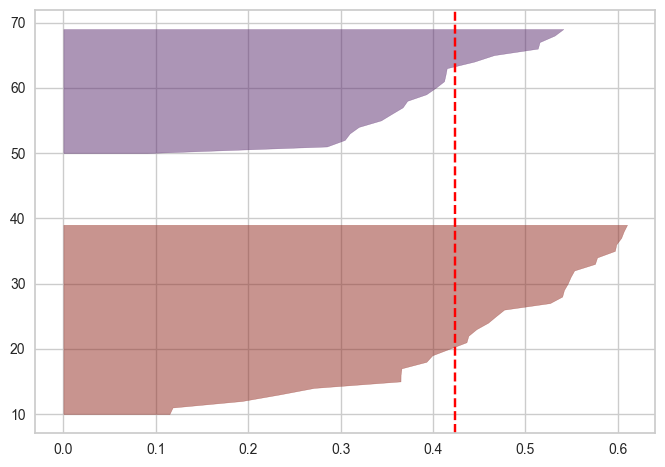

In [80]:

sil_visualizer1 = SilhouetteVisualizer(model_kmeans, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)



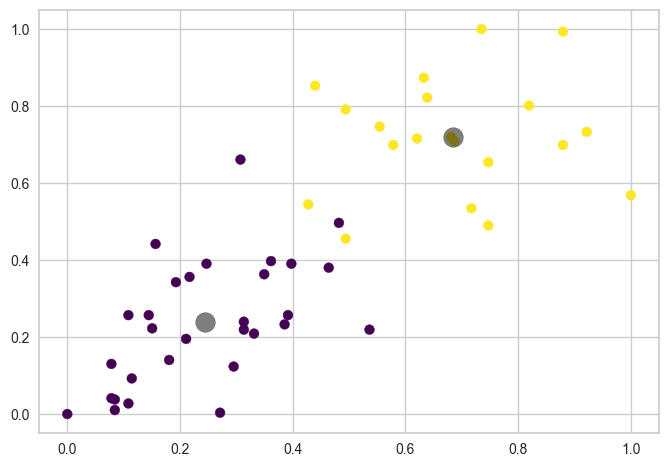

In [81]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(minmax_df[:,0], minmax_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)


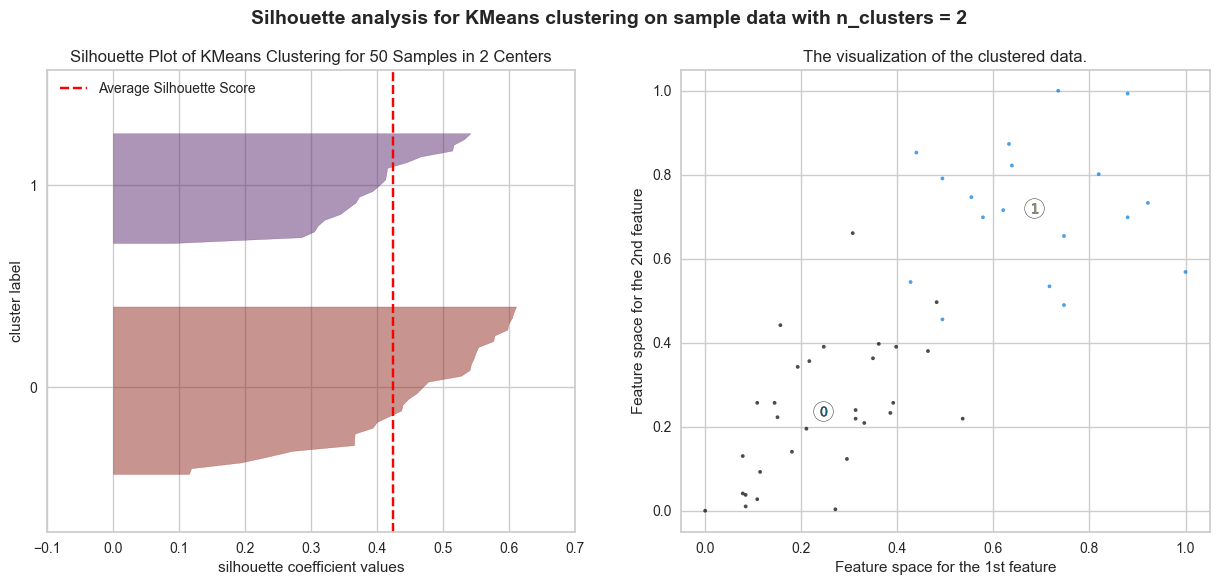

In [82]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 4) # 6 is number of clusters
ax2.scatter(minmax_df[:, 0], minmax_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

#### We can now clearly see the 2 number of clusters formed, which can be described as under
Cluster0, Safe Zone Defines the group of Urban States with Lowest of Crimes

Cluster1, Danger Zone Defines the group of Urban States with Highest Rate of Crimes

# Hierarchical Clustering Algorithm

## What is Hierarchical Clustering?
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. 

Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. 

The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

### Types Of Hierarchical Clustering:
#### There are two types of hierarchical clustering:
##### Agglomerative: 
The data points are clustered using a bottom-up approach starting with individual data points.
##### Divisive:
The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

##### linkage{“ward”, “complete”, “average”, “single”}, default=”ward” Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

### Dendogram on MinMaxScaler Applied on Dataset


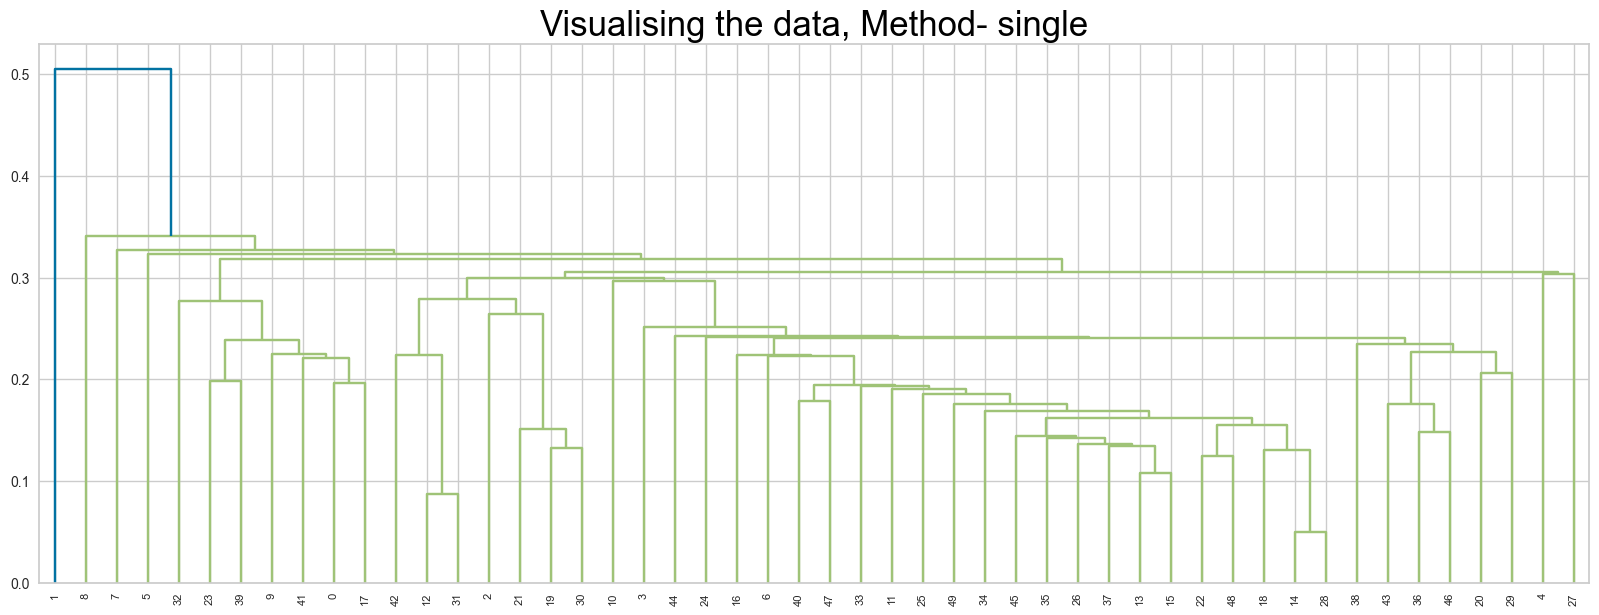

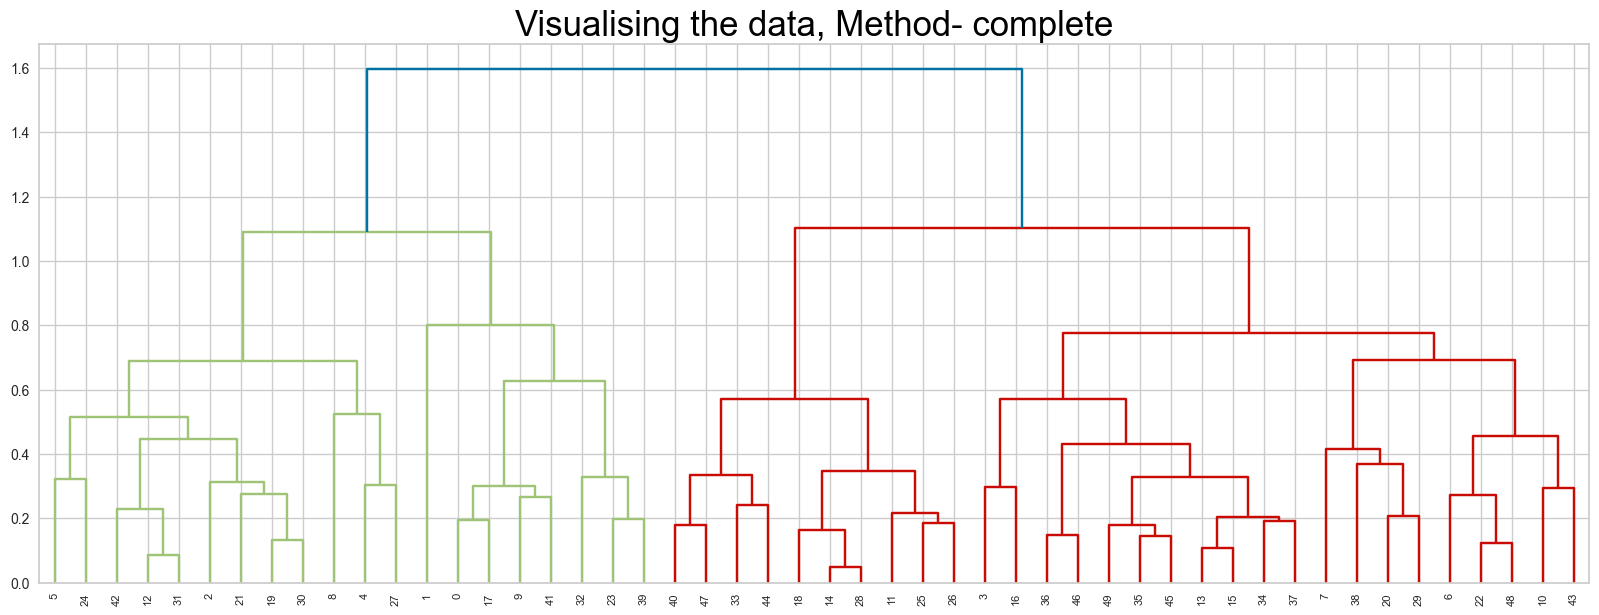

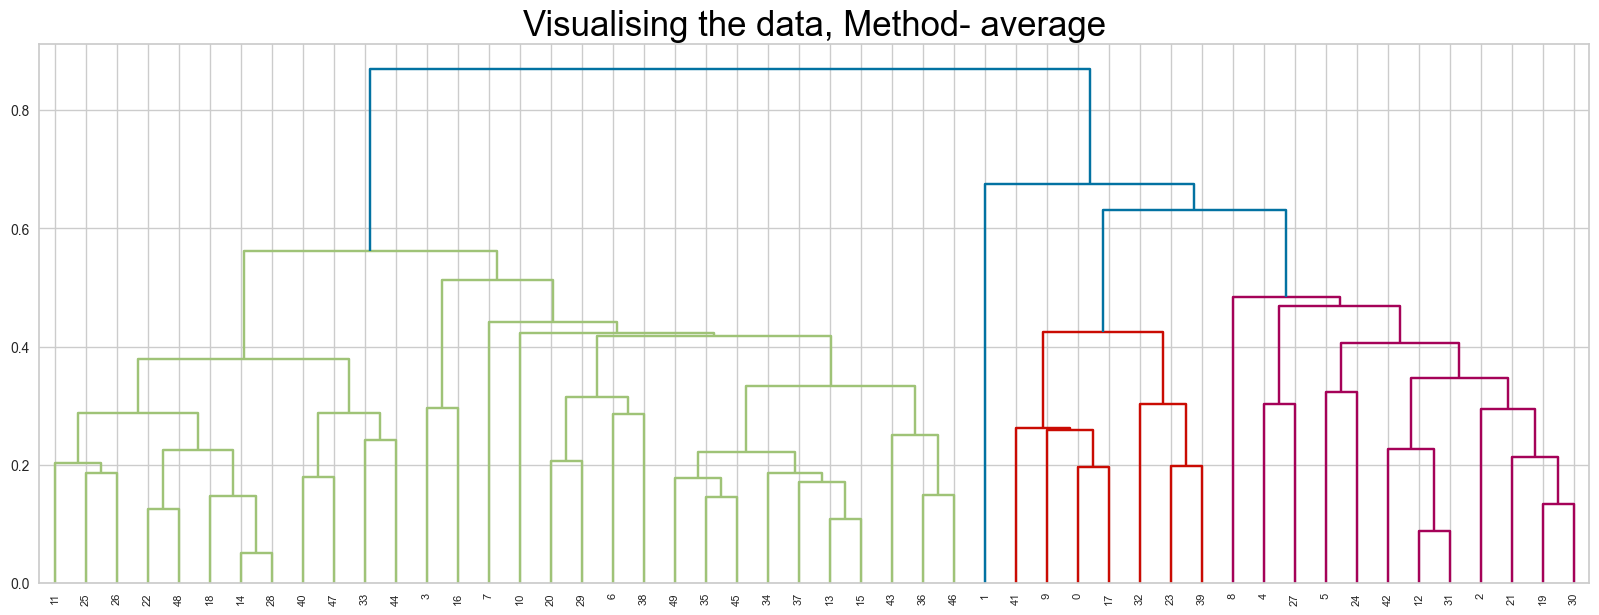

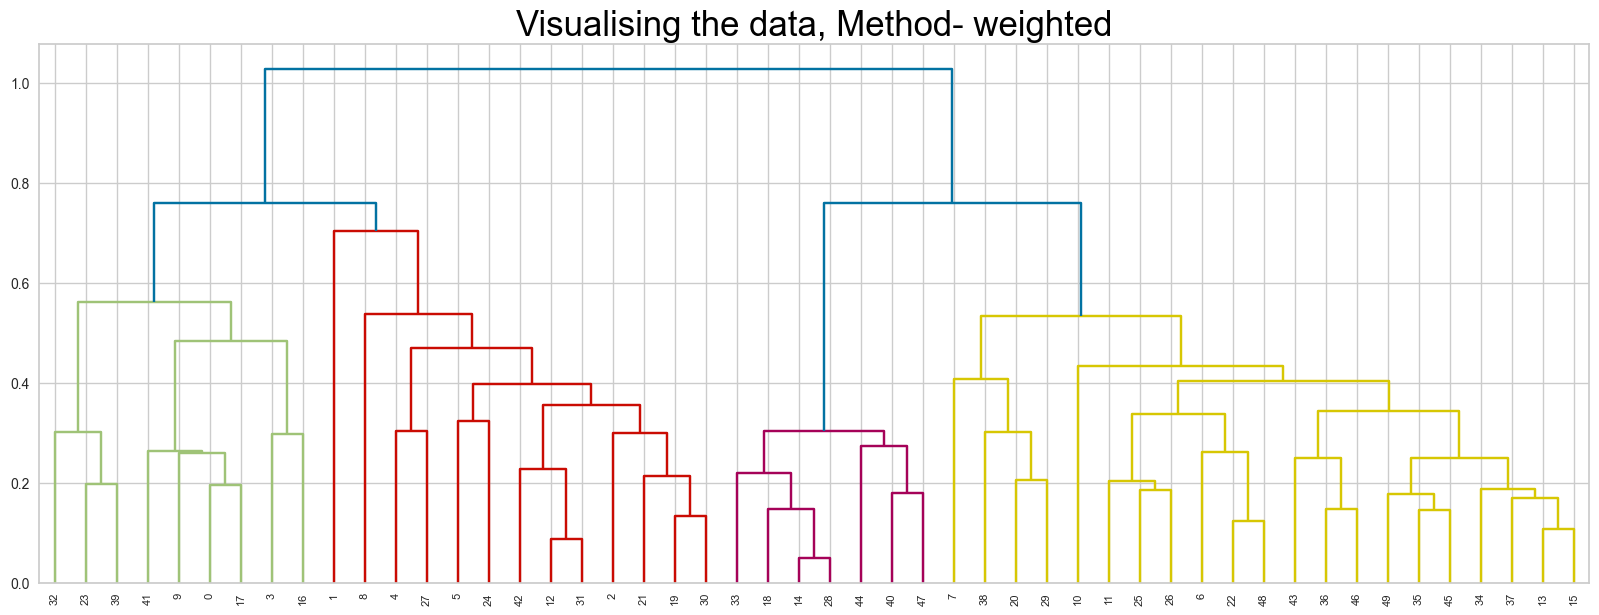

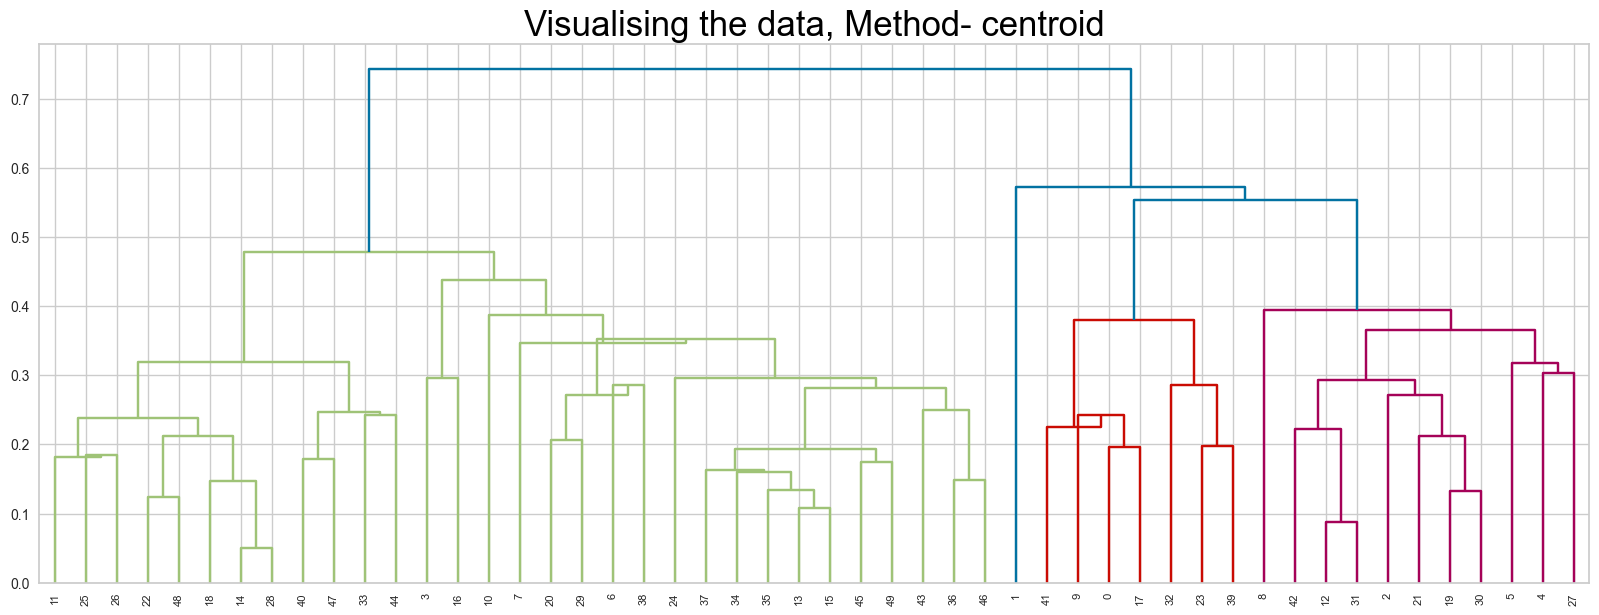

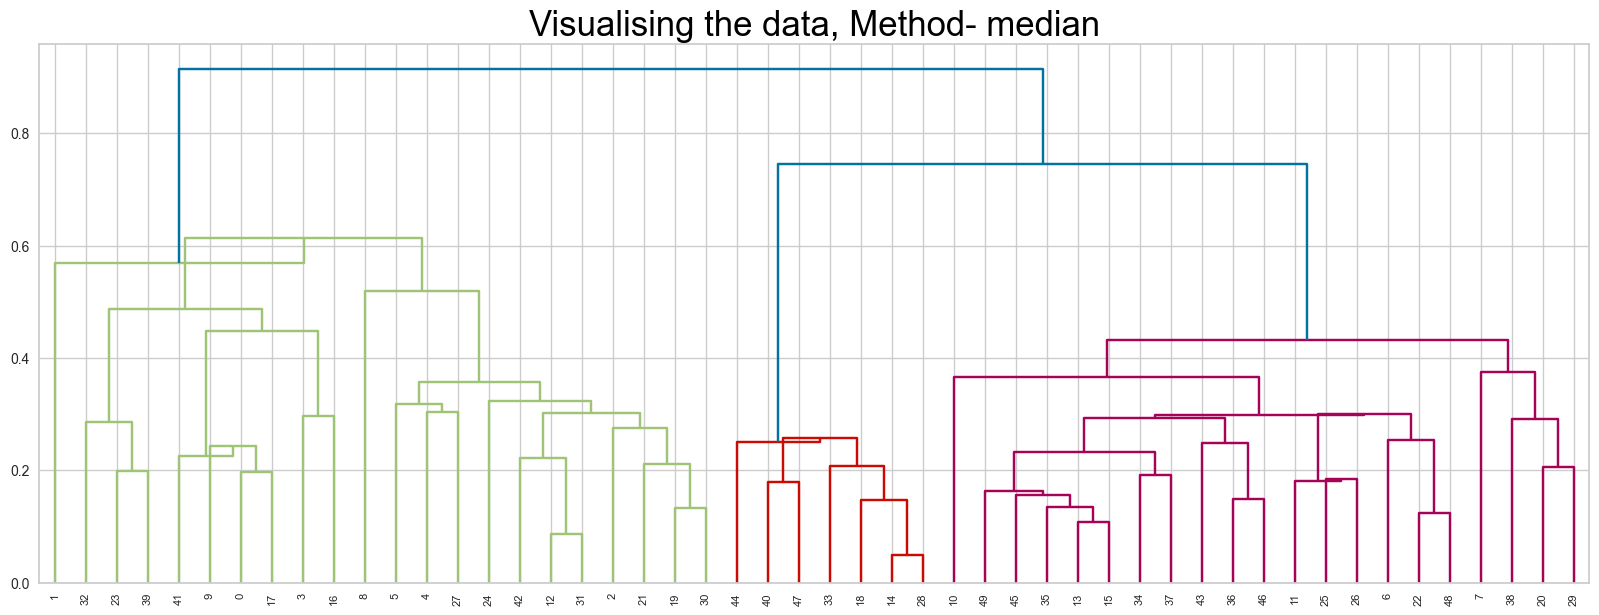

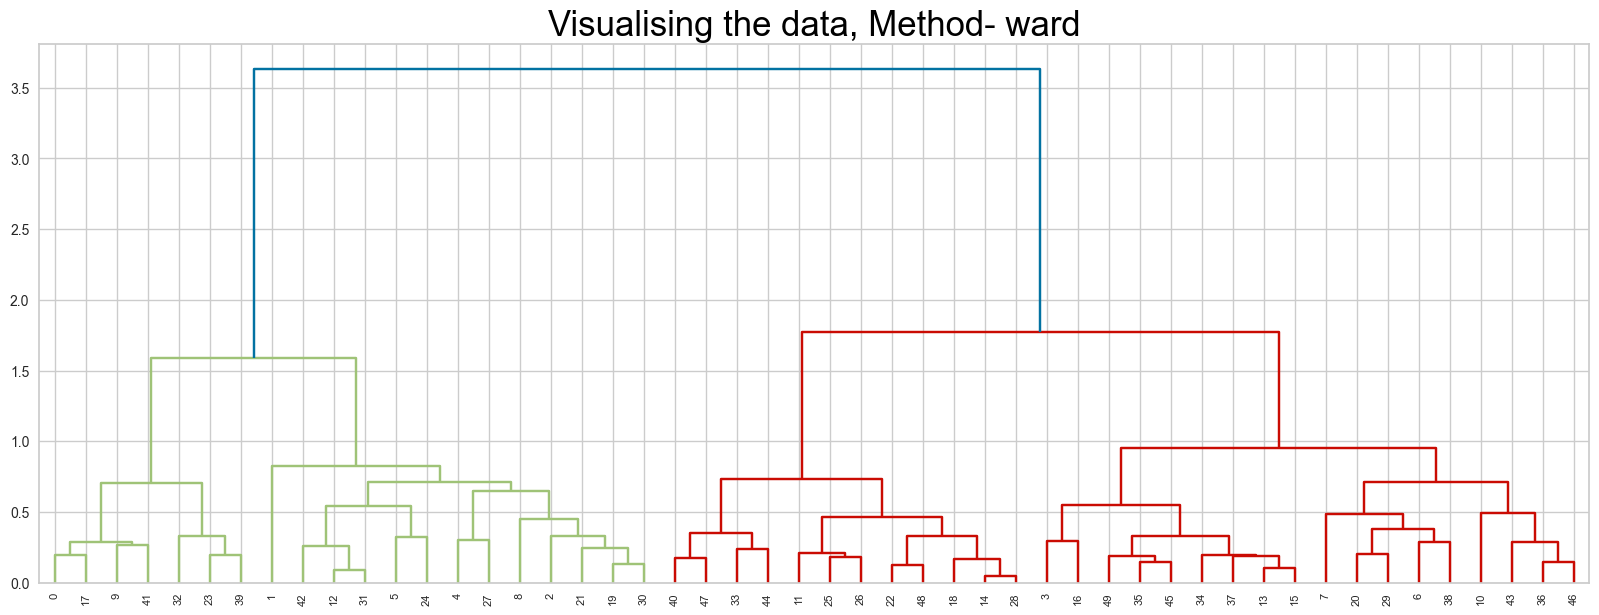

In [83]:
#'ward' minimizes the variance of the clusters being merged.
#'average' uses the average of the distances of each observation of the two sets.
#'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.
#'single' uses the minimum of the distances between all observationsof the two sets.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20,7)) 
    
    dict = {'fontsize':25,'fontweight' :15, 'color' : 'black'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))


In [84]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

<b>The seperation in Each Method indicate that 2 clusters are the optimal number for clusters.<b>

Because the silhoutte score is good in data of 2 cluster 

### Dendrogram on Standard Scaler Applied on Data


In [85]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

#### Max score is with cluster numbers 2 in both standard scaler transformation and Min Max scaler transformation.

### Now, we Run Hierarchical Clustering.(Agglomerative Clustering)


In [86]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
y_pred_h= agg_clustering.fit_predict(minmax_df)
print(y_pred_h.shape)
y_pred_h

(50,)


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [87]:
agg_clustering.n_clusters_

2

In [88]:
(sil(minmax_df,agg_clustering.labels_)*100).round(3)

42.364

In [89]:
#Putting Cluster lables into original dataset And analysis of the same
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.groupby('Hierarchical_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label  \
                       mean        mean       mean       mean         mean   
Hierarchical_labels                                                          
0                    12.165  255.250000  68.400000  29.165000     1.050000   
1                     4.870  114.433333  63.633333  15.943333     1.133333   

                    Kmeans_label_M  
                              mean  
Hierarchical_labels                 
0                              1.0  
1                              0.0

In [90]:
df

Murder  Assault  UrbanPop  Rape  Kmeans_label  Kmeans_label_M  \
State                                                                           
Alabama           13.2      236        58  21.2             1               1   
Alaska            10.0      263        48  44.5             1               1   
Arizona            8.1      294        80  31.0             1               1   
Arkansas           8.8      190        50  19.5             2               0   
California         9.0      276        91  40.6             1               1   
Colorado           7.9      204        78  38.7             1               1   
Connecticut        3.3      110        77  11.1             2               0   
Delaware           5.9      238        72  15.8             2               0   
Florida           15.4      335        80  31.9             1               1   
Georgia           17.4      211        60  25.8             1               1   
Hawaii             5.3       46        83  20.2             2               0   
Idaho              2.6      120        54  14.2             0               0   
Illinois          10.4      249        83  24.0             1               1   
Indiana            7.2      113        65  21.0             2               0   
Iowa               2.2       56        57  11.3             0               0   
Kansas             6.0      115        66  18.0             2               0   
Kentucky           9.7      109        52  16.3             0               0   
Louisiana         15.4      249        66  22.2             1               1   
Maine              2.1       83        51   7.8             0               0   
Maryland          11.3      300        67  27.8             1               1   
Massachusetts      4.4      149        85  16.3             2               0   
Michigan          12.1      255        74  35.1             1               1   
Minnesota          2.7       72        66  14.9             0               0   
Mississippi       16.1      259        44  17.1             1               1   
Missouri           9.0      178        70  28.2             2               1   
Montana            6.0      109        53  16.4             0               0   
Nebraska           4.3      102        62  16.5             0               0   
Nevada            12.2      252        81  46.0             1               1   
New Hampshire      2.1       57        56   9.5             0               0   
New Jersey         7.4      159        89  18.8             2               0   
New Mexico        11.4      285        70  32.1             1               1   
New York          11.1      254        86  26.1             1               1   
North Carolina    13.0      337        45  16.1             1               1   
North Dakota       0.8       45        44   7.3             0               0   
Ohio               7.3      120        75  21.4             2               0   
Oklahoma           6.6      151        68  20.0             2               0   
Oregon             4.9      159        67  29.3             2               0   
Pennsylvania       6.3      106        72  14.9             2               0   
Rhode Island       3.4      174        87   8.3             2               0   
South Carolina    14.4      279        48  22.5             1               1   
South Dakota       3.8       86        45  12.8             0               0   
Tennessee         13.2      188        59  26.9             1               1   
Texas             12.7      201        80  25.5             1               1   
Utah               3.2      120        80  22.9             2               0   
Vermont            2.2       48        32  11.2             0               0   
Virginia           8.5      156        63  20.7             2               0   
Washington         4.0      145        73  26.2             2               0   
West Virginia      5.7       81        39   9.3

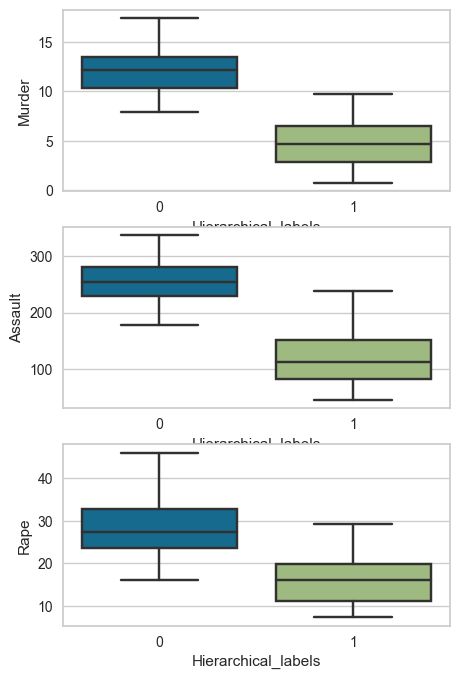

In [91]:
#plt.figure(figsize=(10,5))
fig, axes=plt.subplots(3,1,figsize=(5,8))

sn.boxplot(x='Hierarchical_labels', y='Murder', data=df,ax=axes[0])
sn.boxplot(x='Hierarchical_labels', y='Assault', data=df,ax=axes[1])
sn.boxplot(x='Hierarchical_labels', y='Rape', data=df,ax=axes[2])
plt.show()

#### Observations:
The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

### DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

Why do we need a Density-Based clustering algorithm like DBSCAN when we already have K-means clustering?

K-Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come across some odd shape data.

Another challenge with k-means is that you need to specify the number of clusters (“k”) in order to use it. Much of the time, we won’t know what a reasonable k value is a priori.

What’s nice about DBSCAN is that you don’t have to specify the number of clusters to use it. All you need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions.

##### Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.
The DBSCAN algorithm uses two parameters:

###### minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.

###### eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.

These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.

##### There are three types of points after the DBSCAN clustering is complete:
Core — This is a point that has at least m points within distance n from itself.

Border — This is a point that has at least one Core point at a distance n.

Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

## DBSCAN of Standard Scaled Data
To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.


In [108]:
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,5)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []


In [109]:

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df, DBS_clustering.labels_))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
t = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
t['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(t, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="PuBuGn", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

pivot_1

In [95]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values


In [96]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
print(dbscan.fit(std_df))

dbscan.labels_

DBSCAN(eps=1.5, min_samples=1)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [97]:
# -1 are the noise points in our dataset and the rest are the clusters
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  Kmeans_label_M  \
State                                                                       
Alabama       13.2      236        58  21.2             1               1   
Alaska        10.0      263        48  44.5             1               1   
Arizona        8.1      294        80  31.0             1               1   
Arkansas       8.8      190        50  19.5             2               0   
California     9.0      276        91  40.6             1               1   

            Hierarchical_labels  DBSCAN_labels  
State                                           
Alabama                       0              0  
Alaska                        0              1  
Arizona                       0              0  
Arkansas                      1              0  
California                    0              0

In [98]:
df.groupby('DBSCAN_labels').agg(['mean'])


Murder     Assault   UrbanPop       Rape Kmeans_label  \
                    mean        mean       mean       mean         mean   
DBSCAN_labels                                                             
0               7.742857  168.877551  65.897959  20.757143     1.102041   
1              10.000000  263.000000  48.000000  44.500000     1.000000   

              Kmeans_label_M Hierarchical_labels  
                        mean                mean  
DBSCAN_labels                                     
0                   0.387755            0.612245  
1                   1.000000            0.000000

In [99]:
# Silhouette Score for DBSCAN
print("Silhouette Coefficient: %0.3f" % sil(std_df, dbscan.labels_))


Silhouette Coefficient: 0.235


### DBSCAN on MinMax Scaled Data
To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [100]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(minmax_df, DBS_clustering.labels_))

In [101]:
DBSCAN_params

[(0.25, 1), (0.25, 2), (0.5, 1), (0.5, 2)]

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


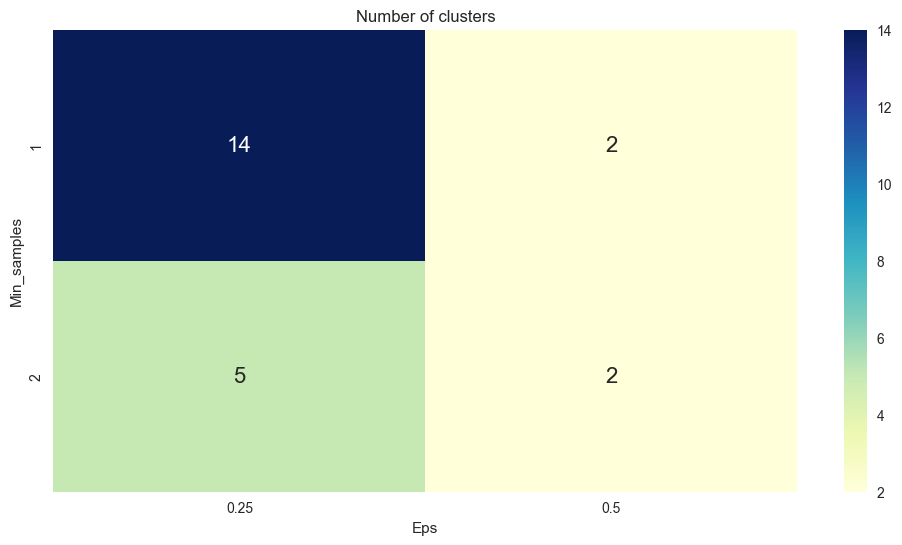

Eps          0.25  0.50
Min_samples            
1              14     2
2               5     2

In [102]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

pivot_1

In [103]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [104]:
#Run DBSCAN on Minmax Scaled data with optimal min_sample and epsilon values
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
print(dbscan.fit(minmax_df))

dbscan.labels_

DBSCAN(min_samples=1)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [105]:
# 1 are the noise points in our dataset and the rest are the clusters
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  Kmeans_label_M  \
State                                                                       
Alabama       13.2      236        58  21.2             1               1   
Alaska        10.0      263        48  44.5             1               1   
Arizona        8.1      294        80  31.0             1               1   
Arkansas       8.8      190        50  19.5             2               0   
California     9.0      276        91  40.6             1               1   

            Hierarchical_labels  DBSCAN_labels  
State                                           
Alabama                       0              0  
Alaska                        0              1  
Arizona                       0              0  
Arkansas                      1              0  
California                    0              0

In [106]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

Cluster1_avg  Cluster2_avg
Murder                   7.742857          10.0
Assault                168.877551         263.0
UrbanPop                65.897959          48.0
Rape                    20.757143          44.5
Kmeans_label             1.102041           1.0
Kmeans_label_M           0.387755           1.0
Hierarchical_labels      0.612245           0.0
DBSCAN_labels            0.000000           1.0

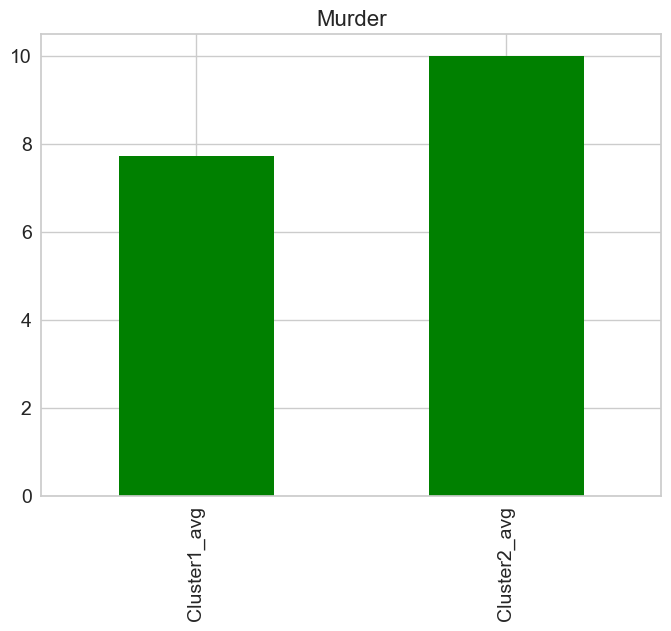

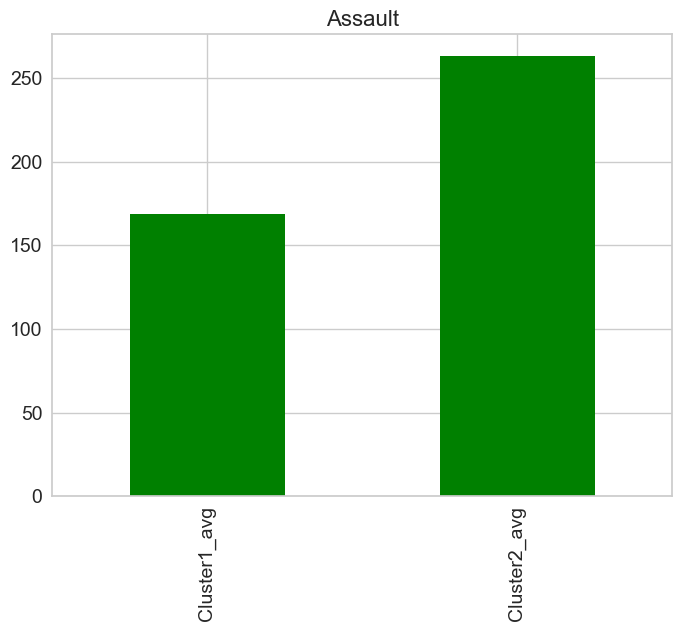

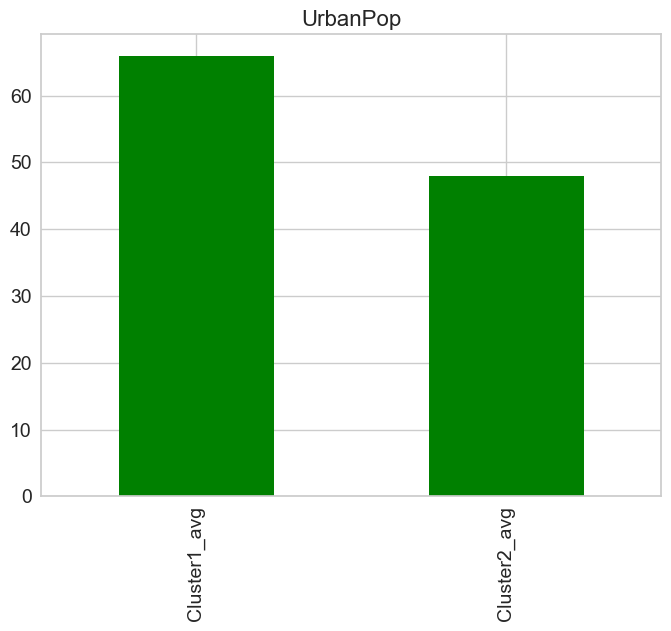

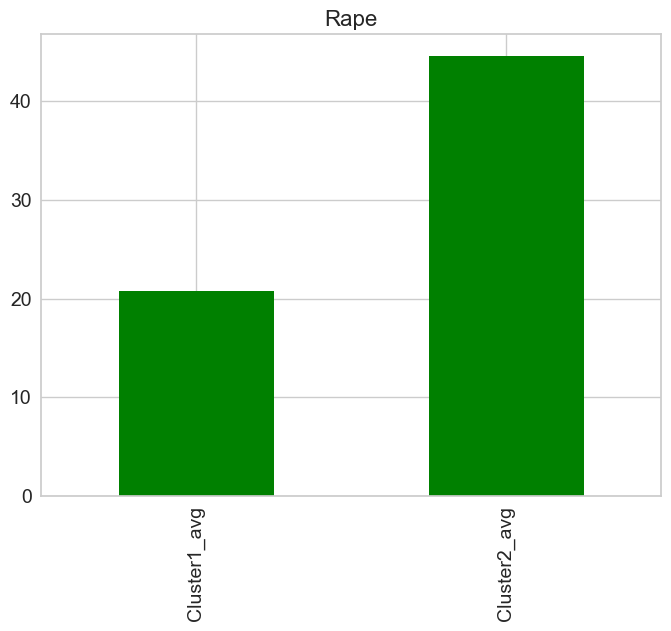

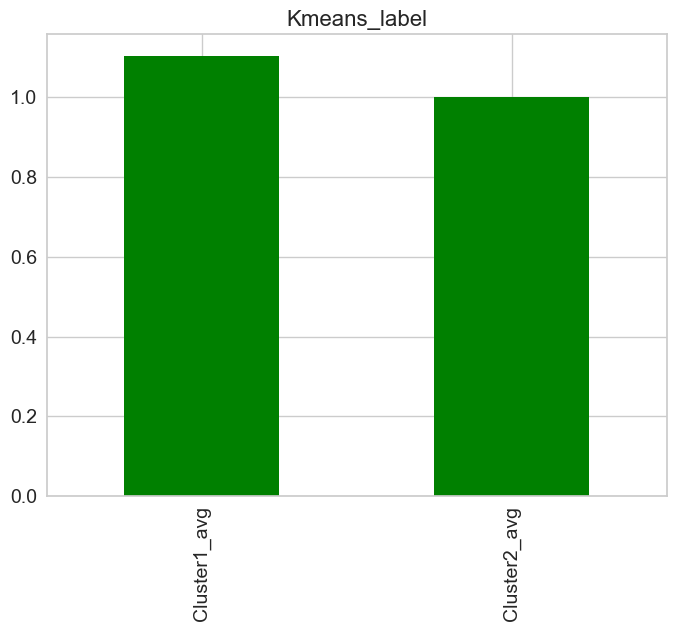

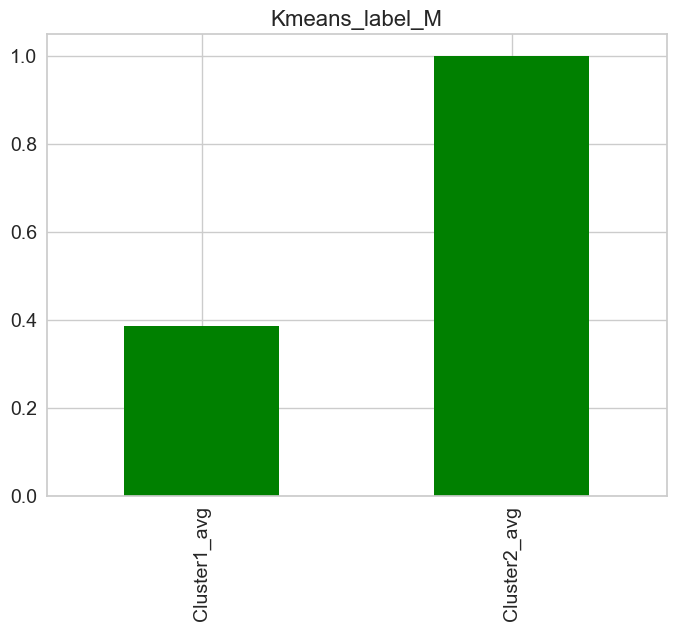

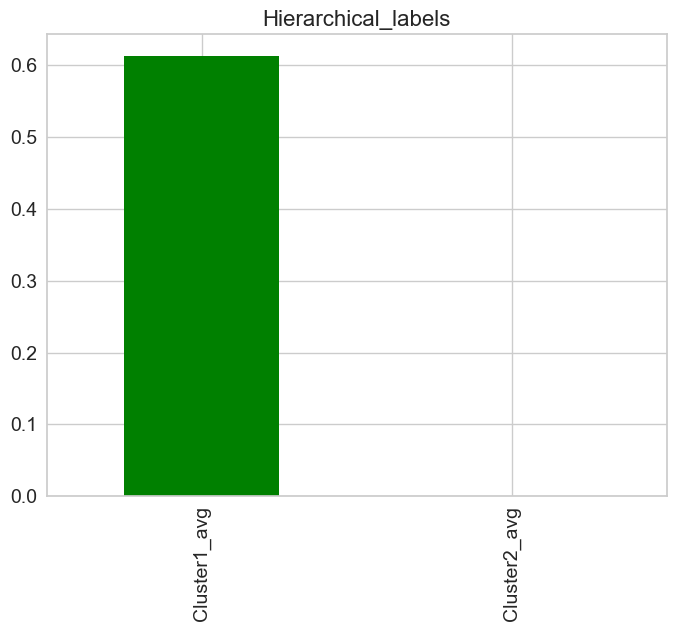

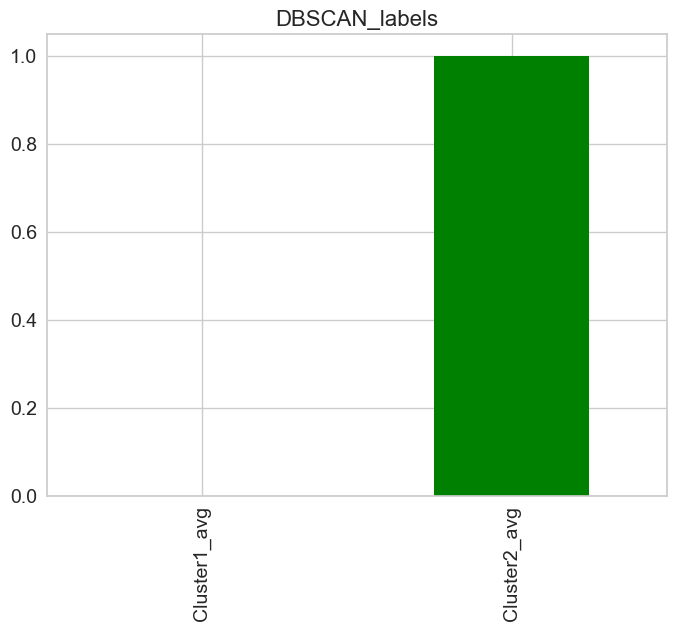

In [107]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14,color='green')
    plt.show()
    print()

#### Observations:
##### The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
##### The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

# Conclusion:
I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
Applied Standardazation & MinMaxScalar transformation on the data 

I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.

By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.

KMeans clustering is sensitive to outliers